<a href="https://colab.research.google.com/github/ayush2444/Cardiovascular_Risk_Prediction/blob/main/Cardiovascular_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Classification



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
Name - Ayush Shrivastava


# **Project Summary -**

The Cardiovascular Risk Prediction dataset includes data on 3,390 individuals, featuring 16 predictor variables and 1 target variable. Each variable represents a potential risk factor, including demographic, behavioral, and medical factors. Our objective was to predict the likelihood of developing coronary heart disease (CHD) over a 10-year period.

The medical community has been exploring the use of machine learning techniques to create screening tools, and our project aims to provide an overview of this process. Specifically, we will be developing a screening tool that predicts a patient's 10-year risk of developing coronary heart disease (CHD) based on their current health status. We will employ various machine learning techniques to accomplish this goal.

The initial step of the project was to gather and preprocess the data by addressing missing values and outliers. We also performed data type conversion to facilitate visualization. Subsequently, we conducted a thorough exploratory data analysis by creating various plots such as univariate, bivariate and multivariate graphs. This approach allowed us to extract valuable insights that informed our subsequent decisions regarding the machine learning model pipeline.

After completing initial data exploration, we performed feature engineering and data preprocessing to extract new features such as pulse_pressure and glucose_diabetes. These new features were derived from the existing ones that were not directly related to the target variable, tenYearCHD. We also addressed the issue of multicollinearity among independent variables by calculating the variance inflation factor (VIF) and removing the features with high VIF scores. This process helped us to identify the most important features for our model and improved its overall performance.  Outliers were not removed from the dataset as they can contain valuable information that is important for predicting the 10-year risk of developing coronary heart disease. Additionally, we found that some of the features were categorical, which cannot be understood by machine learning models. To address this issue, we used binary label encoding to convert these categorical features into numerical values.

The dataset we worked on was highly imbalanced as the distribution of the target variable, TenYearCHD, showed that only 15% of individuals were classified as having a high risk of developing CHD. To address this issue, we used the SMOTE (Synthetic Minority Oversampling Technique) to balance the dataset by generating synthetic samples of the minority class.

After splitting and standardizing the data, we proceeded to apply various machine learning algorithms. The algorithms we experimented with included Logistic Regression, Decision Tree, Random Forest, K-Nearest Neighbors, XGBoost, and Support Vector Machine.

The model evaluation process involved comparing the performance of different algorithms using metrics such as confusion matrix, recall, f1 score, and accuracy. Since this was healthcare data, we placed greater emphasis on recall to reduce the number of false negative cases, which is a critical objective. Additionally, we considered f1 score as an important metric for balancing precision and recall. Finally, we also evaluated the overall accuracy of the models.After tinkering with various machine learning algorithms and carefully tuning their hyperparameters, we finally found our diamond in the rough - the XGBoost model. This magnificent model boasted an impressive accuracy of 88%, with an F1_score of 87% to boot. Not only that, but its precision was a staggering 92%, ensuring that we could trust its predictions with utmost confidence. And let's not forget its solid recall of 84%, making sure we catch as many true positives as possible. All in all, it was a clear winner among our army of models.

Throughout our journey of developing a machine learning model for predicting cardiovascular risk, we encountered several hurdles and setbacks. However, by applying a combination of data processing techniques, machine learning algorithms, and model evaluation methods, we overcame these challenges and ultimately achieved success. Our final model has the ability to accurately predict the risk of developing coronary heart disease in a patient, making it a valuable tool in the field of healthcare.

# **GitHub Link -**

https://github.com/ayush2444/Cardiovascular_Risk_Prediction

# **Problem Statement**


The dataset is from ongoing cardiovascular study on residents of the town of Framingham, Massachutts. The classification goal is to predict whether the patient has a 10-year risk of failure coronary heart disease(CHD). The dataset provides the patient's information . It includes around 4000 records and 16 attributes. Each attribute is a potental risk factor. There are both demographic, behavioral, and medical risk factor.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [242]:
# Import Libraries
# For data visualisation
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline


# Machine learning model selection 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


# For feature engineering and selection 
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2  #feature selection for classification
from sklearn.metrics import recall_score    #to measure model performance


# Importing classification metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import make_scorer, recall_score, f1_score


# importing the missingo library, which enables us to see the values that are missing.
import missingno as msno

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [243]:
# Load Dataset
path = '/content/data_cardiovascular_risk.csv'
df = pd.read_csv(path,index_col='id')

### Dataset First View

In [244]:
# Dataset First Look
df.head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
id                                                                       
0    64        2.0   F        YES         3.0     0.0                0   
1    36        4.0   M         NO         0.0     0.0                0   
2    46        1.0   F        YES        10.0     0.0                0   
3    50        1.0   M        YES        20.0     0.0                0   
4    64        1.0   F        YES        30.0     0.0                0   

    prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
id                                                                             
0              0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1              1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2              0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3              1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4              0         0    241.0  136.5   85.0  26.42       70.0     77.0   

    TenYearCHD  
id              
0            1  
1            0  
2            0  
3            1  
4            0

### Dataset Rows & Columns count

In [245]:
# Dataset Rows & Columns count
print(f"Cardiovascular Dataset: Rows= {df.shape[0]}, Columns= {df.shape[1]}")

Cardiovascular Dataset: Rows= 3390, Columns= 16


### Dataset Information

In [246]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


#### Duplicate Values

In [247]:
# Dataset Duplicate Value Count
print(f'The total number of duplicate values in the data: {df.duplicated().sum()}')

The total number of duplicate values in the data: 0


 we do not have any duplicated observations in our dataset.



#### Missing Values/Null Values

In [248]:
# Missing Values/Null Values Count
df.isnull().sum()


age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [249]:
Null_values  = df.isnull().sum()/len(df)
print(f"{Null_values.sort_values(ascending=False)*100}%")

glucose            8.967552
education          2.566372
BPMeds             1.297935
totChol            1.120944
cigsPerDay         0.648968
BMI                0.412979
heartRate          0.029499
age                0.000000
sex                0.000000
is_smoking         0.000000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
sysBP              0.000000
diaBP              0.000000
TenYearCHD         0.000000
dtype: float64%


In [250]:
# total null values
df.isna().sum().sum()

510

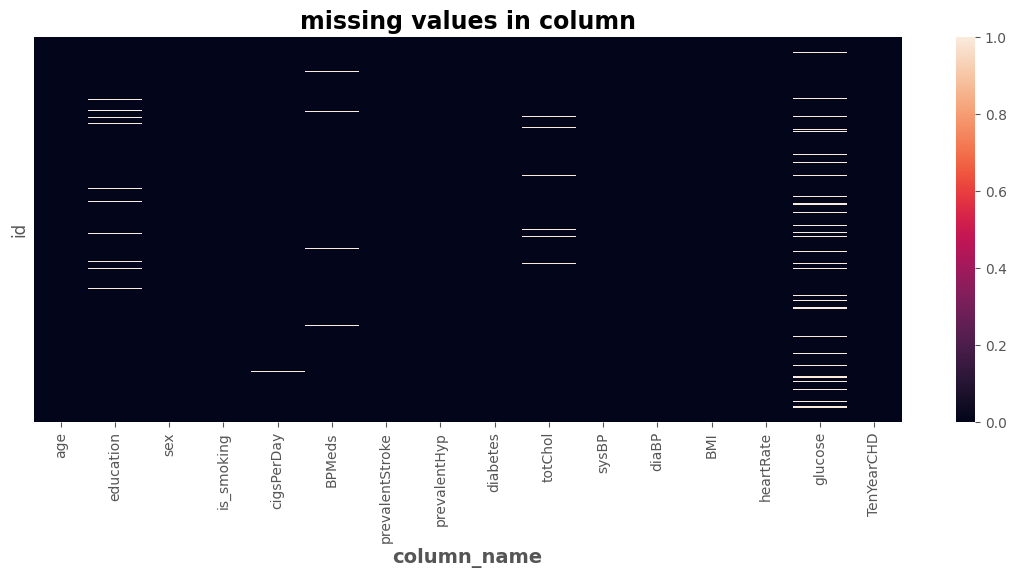

In [251]:
# Visualizing the missing values
plt.figure(figsize=(14, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

<Axes: >

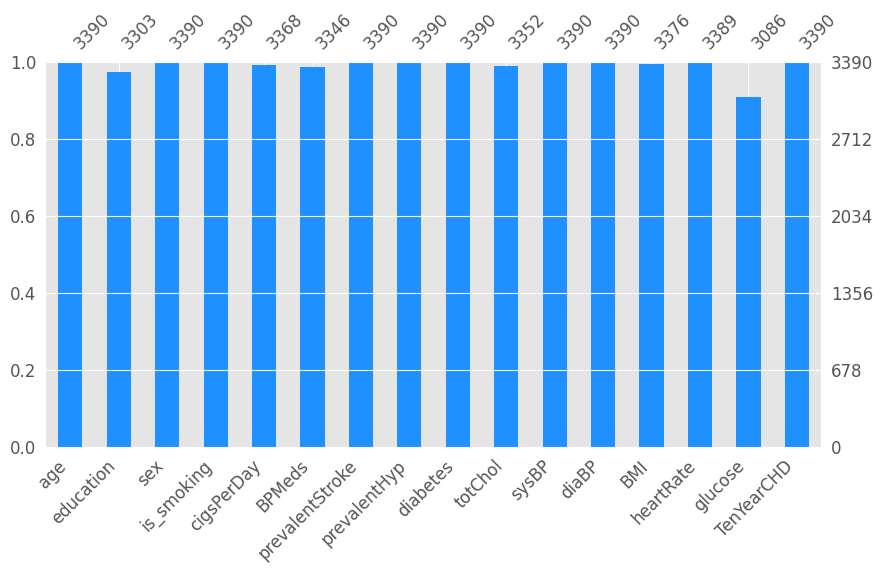

In [252]:
misno.bar(df,color=("dodgerblue"),figsize=(10,5), fontsize=12)

The dataset, from an ongoing cardiovascular study on residents of Framingham, Massachusetts, aims to predict whether a patient has a 10-year risk of future coronary heart disease (CHD) using demographic, behavioral, and medical risk factors. It contains 3390 rows and 16 columns, with no duplicate records but 510 missing values.

### What did you know about your dataset?

The dataset has 3390 rows and 16 columns, with no duplicated observations. The features 'sex' and 'is_smoking' are of object type, while the rest are numeric. Six features, 'glucose', 'education', 'BPMeds', 'totChol', 'cigsPerDay', and 'BMI', contain null values, with percentages of 8.96%, 2.56%, 1.29%, 1.12%, 0.64%, and 0.41%, respectively.

## ***2. Understanding Your Variables***

In [253]:
# Dataset Columns
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [254]:
# Dataset Describe
df.describe(include = 'all')

age    education   sex is_smoking   cigsPerDay       BPMeds  \
count   3390.000000  3303.000000  3390       3390  3368.000000  3346.000000   
unique          NaN          NaN     2          2          NaN          NaN   
top             NaN          NaN     F         NO          NaN          NaN   
freq            NaN          NaN  1923       1703          NaN          NaN   
mean      49.542183     1.970936   NaN        NaN     9.069477     0.029886   
std        8.592878     1.019081   NaN        NaN    11.879078     0.170299   
min       32.000000     1.000000   NaN        NaN     0.000000     0.000000   
25%       42.000000     1.000000   NaN        NaN     0.000000     0.000000   
50%       49.000000     2.000000   NaN        NaN     0.000000     0.000000   
75%       56.000000     3.000000   NaN        NaN    20.000000     0.000000   
max       70.000000     4.000000   NaN        NaN    70.000000     1.000000   

        prevalentStroke  prevalentHyp     diabetes      totChol       sysBP  \
count       3390.000000   3390.000000  3390.000000  3352.000000  3390.00000   
unique              NaN           NaN          NaN          NaN         NaN   
top                 NaN           NaN          NaN          NaN         NaN   
freq                NaN           NaN          NaN          NaN         NaN   
mean           0.006490      0.315339     0.025664   237.074284   132.60118   
std            0.080309      0.464719     0.158153    45.247430    22.29203   
min            0.000000      0.000000     0.000000   107.000000    83.50000   
25%            0.000000      0.000000     0.000000   206.000000   117.00000   
50%            0.000000      0.000000     0.000000   234.000000   128.50000   
75%            0.000000      1.000000     0.000000   264.000000   144.00000   
max            1.000000      1.000000     1.000000   696.000000   295.00000   

              diaBP          BMI    heartRate      glucose   TenYearCHD  
count   3390.000000  3376.000000  3389.000000  3086.000000  3390.000000  
unique          NaN          NaN          NaN          NaN          NaN  
top             NaN          NaN          NaN          NaN          NaN  
freq            NaN          NaN          NaN          NaN          NaN  
mean      82.883038    25.794964    75.977279    82.086520     0.150737  
std       12.023581     4.115449    11.971868    24.244753     0.357846  
min       48.000000    15.960000    45.000000    40.000000     0.000000  
25%       74.500000    23.020000    68.000000    71.000000     0.000000  
50%       82.000000    25.380000    75.000000    78.000000     0.000000  
75%       90.000000    28.040000    83.000000    87.000000     0.000000  
max      142.500000    56.800000   143.000000   394.000000     1.000000

### Variables Description 

**Demographic:**

* Sex: male or female ("M" or "F")
* Age: Age of the patient (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)


* Education: The level of education of the patient (categorical values - 1,2,3,4)

**Behavioral:**
* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical (history):**
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)

**Medical (current):**
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)

**Predict variable (desired target):**
* 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)










### Check Unique Values for each variable.

In [255]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print('Total unique values in' ,i, "is", '-' , df[i].nunique())


Total unique values in age is - 39
Total unique values in education is - 4
Total unique values in sex is - 2
Total unique values in is_smoking is - 2
Total unique values in cigsPerDay is - 32
Total unique values in BPMeds is - 2
Total unique values in prevalentStroke is - 2
Total unique values in prevalentHyp is - 2
Total unique values in diabetes is - 2
Total unique values in totChol is - 240
Total unique values in sysBP is - 226
Total unique values in diaBP is - 142
Total unique values in BMI is - 1259
Total unique values in heartRate is - 68
Total unique values in glucose is - 132
Total unique values in TenYearCHD is - 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [256]:
# Renaming the columns

df.rename(columns= {'cigsPerDay' : 'cigs_per_day','heartRate':'heart_rate',
                    'BPMeds':'bp_meds' , 'prevalentHyp':'prevalent_hyp', 
                    'prevalentStroke':'prevalent_stroke', 'totChol':'total_cholesterol','sysBP':'systolic_bp' , 'diaBP':'diastolic_bp'  
                    , 'BMI':'bmi' , 'TenYearCHD':'ten_year_CHD' }, inplace = True)

In [257]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigs_per_day', 'bp_meds',
       'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'total_cholesterol',
       'systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose',
       'ten_year_CHD'],
      dtype='object')

In [258]:
# Write your code to make your dataset analysis ready.


####Imputing null values 

Before imputing null values using statistical values such as mean, median, or mode, it is essential to examine the **data distribution** and identify any **outliers** present in the dataset.





In [259]:
# storing the features that contains null values in a separate list
null_col_list = ['cigs_per_day','education', 'glucose', 'bp_meds' , 'total_cholesterol', 'bmi', 'heart_rate']

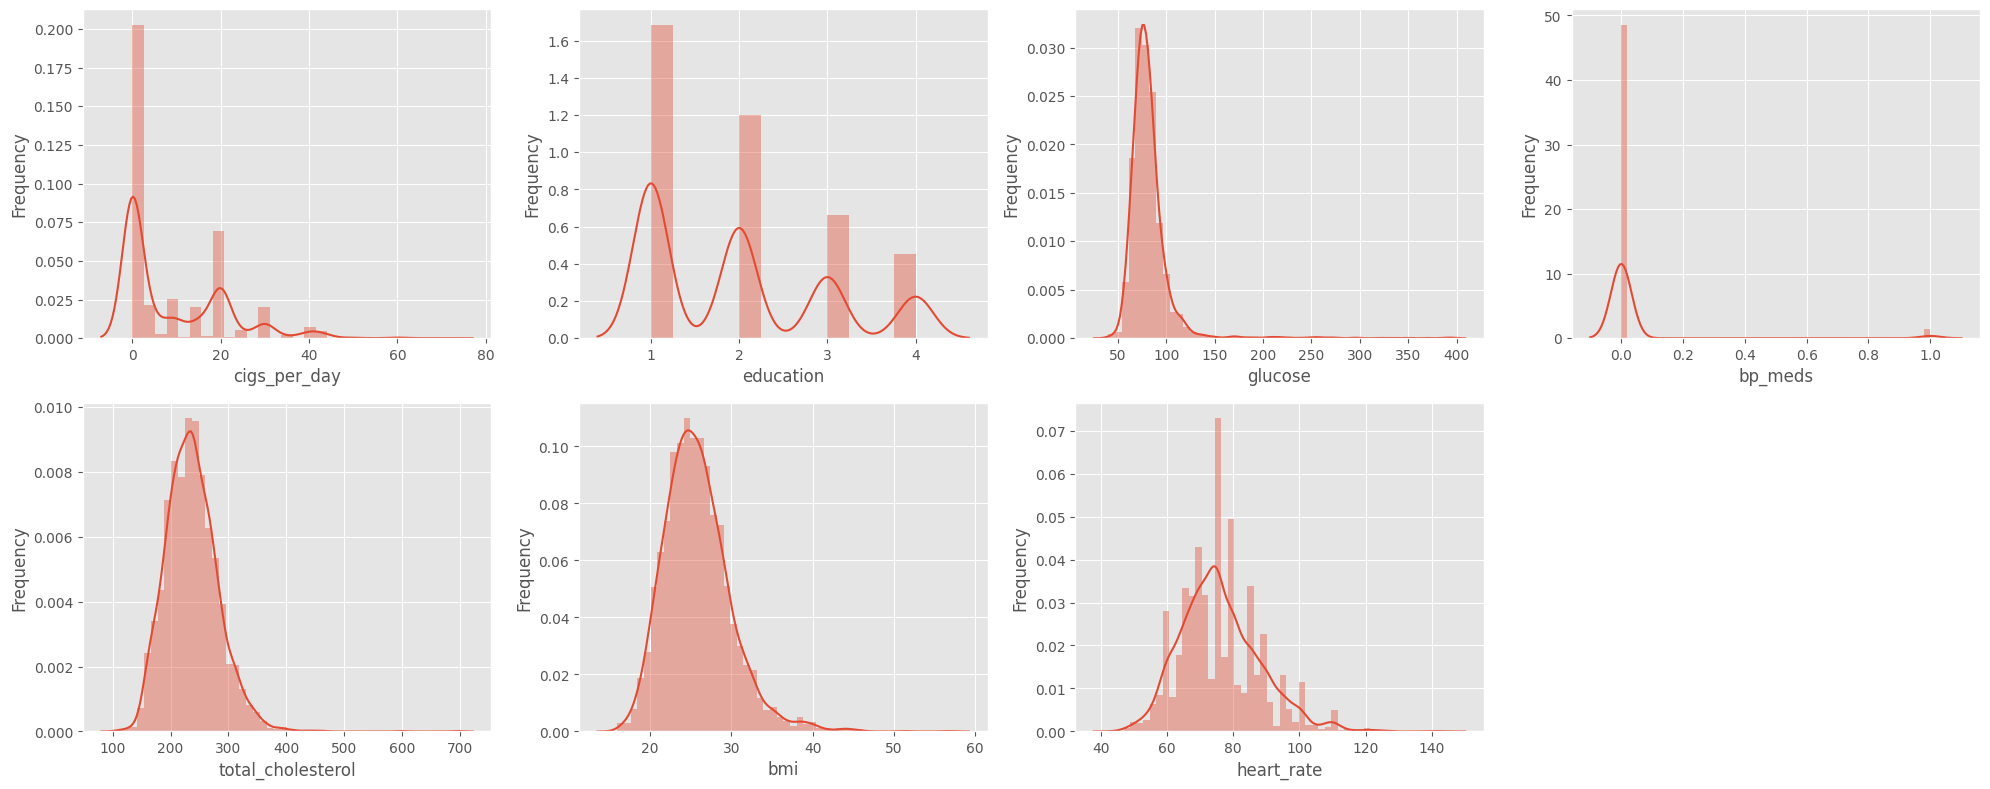

In [260]:
# Create a list of features containing null values
null_col_list = ['cigs_per_day','education', 'glucose', 'bp_meds' , 'total_cholesterol', 'bmi', 'heart_rate']

# Set the figure size
plt.figure(figsize=(20, 8))

# Set the color palette


# Loop through the null_list and plot the distribution of each feature
for i, feature in enumerate(null_col_list):
    plt.subplot(2, 4, i+1)
    sns.distplot(df[feature].dropna())
    plt.xlabel(feature)
    plt.ylabel('Frequency')

# Display the plot
plt.tight_layout()
plt.show()

<Axes: >

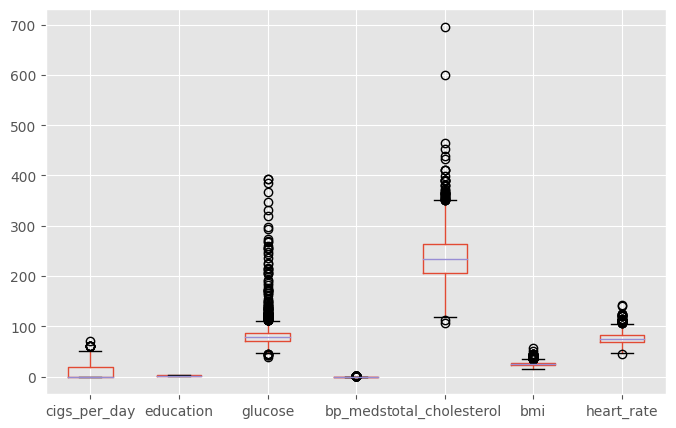

In [261]:
# checking the outlier ofthe columns
plt.figure(figsize=(8,5))
df[null_col_list].boxplot()

To handle normal distributed data without outliers, we use the mean, while the median is more appropriate for numerical, continuous data that has extreme values (outliers). When dealing with categorical data, the mode comes into play.

In [262]:
# Filling up the NaN values of each feature
df['cigs_per_day'].fillna(df['cigs_per_day'].mean(), inplace=True)
df['education'].fillna(df['education'].mode()[0] , inplace = True)
df['glucose'].fillna(df['glucose'].median() , inplace =True)
df['bp_meds'].fillna(df['bp_meds'].mode()[0], inplace=True)
df['total_cholesterol'].fillna(df['total_cholesterol'].median(), inplace=True)
df['bmi'].fillna(df['bmi'].median(), inplace=True)
df['heart_rate'].fillna(df['heart_rate'].median(), inplace=True)

In [263]:
df.isnull().sum()

age                  0
education            0
sex                  0
is_smoking           0
cigs_per_day         0
bp_meds              0
prevalent_stroke     0
prevalent_hyp        0
diabetes             0
total_cholesterol    0
systolic_bp          0
diastolic_bp         0
bmi                  0
heart_rate           0
glucose              0
ten_year_CHD         0
dtype: int64

### What all manipulations have you done and insights you found?

Since the number of cigarettes smoked by the patients who smoke contains outliers, the missing values in ths cigs_per_day column can be imputed with its median value.

Since the total_cholestrol, bmi, and heart_rate columns are positively skewed, and also contains outliers. We can impute the missing values with its median.

The glucose column is positivly right skewed and contain some outlier .There are 304 missing values in the glucose column so we have to impute them with the median

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [264]:
# Creating a list for different column types
Categorical_columns = ['education', 'sex', 'is_smoking', 'bp_meds', 'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'ten_year_CHD']
continous_columns= ['age', 'cigs_per_day', 'total_cholesterol', 'systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose']

#### Chart - 1

In [265]:
# checking the distribution of Target Variable
df.ten_year_CHD.value_counts()

0    2879
1     511
Name: ten_year_CHD, dtype: int64

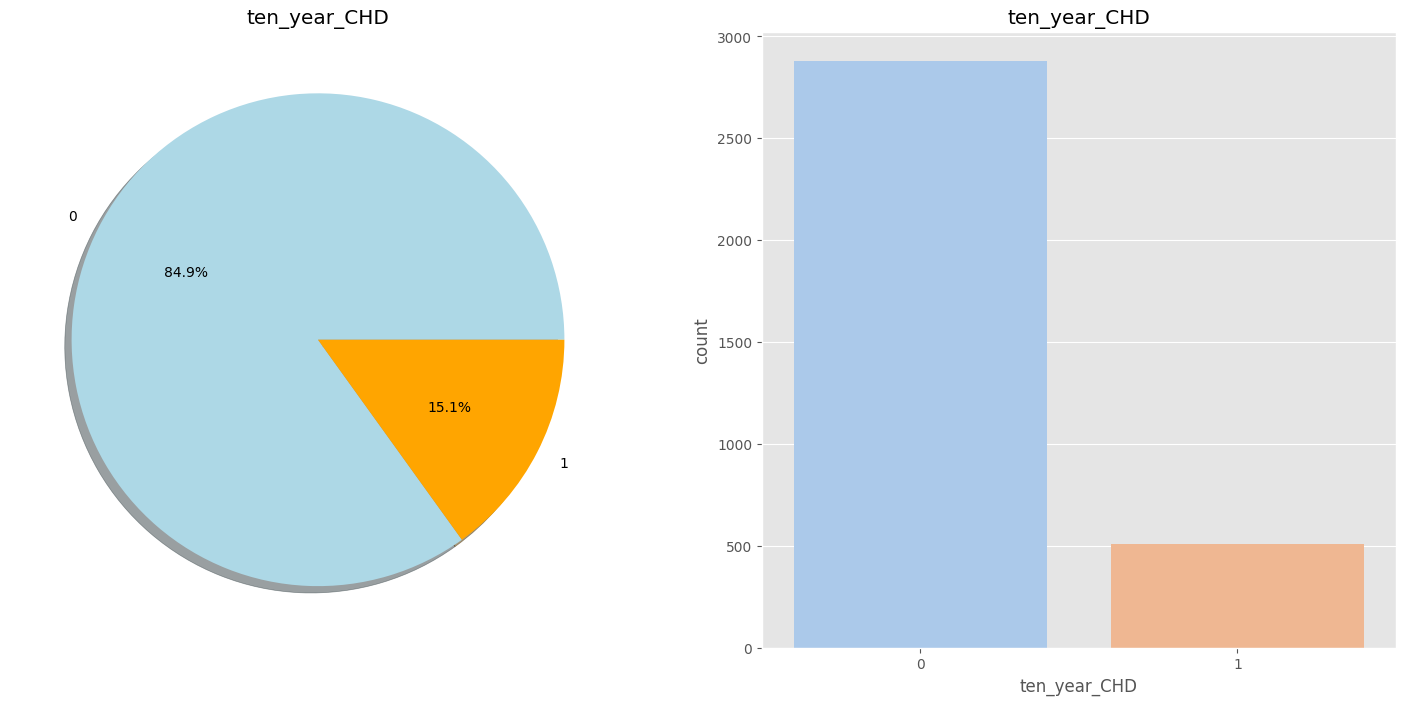

In [266]:
# Chart - 1 visualization code
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df['ten_year_CHD'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True, colors=['lightblue', 'orange'])
ax[0].set_title('ten_year_CHD')
ax[0].set_ylabel('')
sns.countplot(x='ten_year_CHD', data=df, ax=ax[1],palette = "pastel")
ax[1].set_title('ten_year_CHD')
plt.show()

##### 1. Why did you pick the specific chart?

We have picked the bar and count plots to analyze the percentage and count of the target variable because they provide an easy-to-understand visual representation of the distribution of the target variable and help us to identify any class imbalance issues.

##### 2. What is/are the insight(s) found from the chart?

There are  2879 patients without heart disease and 511 patients with the disease.

This plot of the target variable reveals that there is a significant class imbalance with a high proportion of individuals having normal results. This can lead to potential issues for the model's performance, as it may become biased towards predicting "No Risk" due to the overrepresentation of these entries.  To address this issue, SMOTE will be used during train/test split to balance the classes and improve model performance.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

###Univariate Analysis

###**Analyzing the distribution of the continuous independent variable**

#### Chart - 2

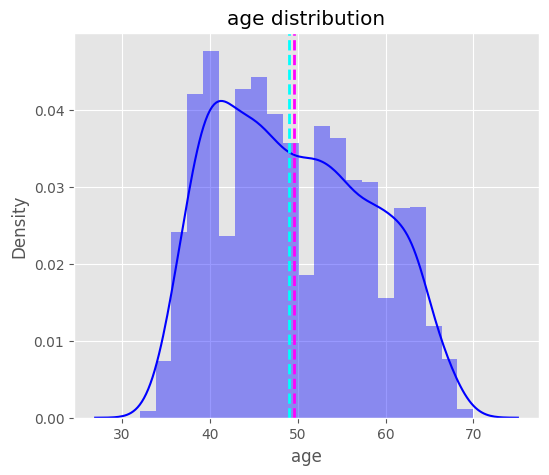

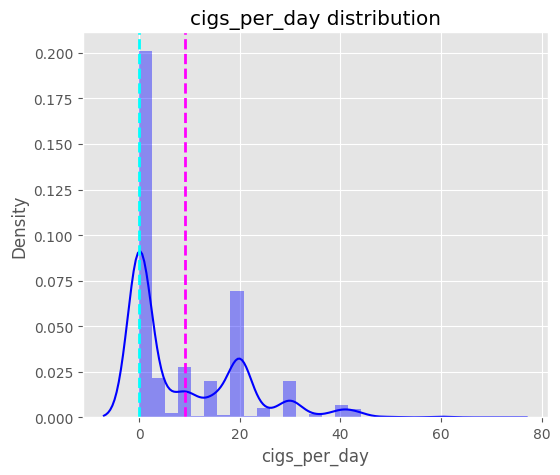

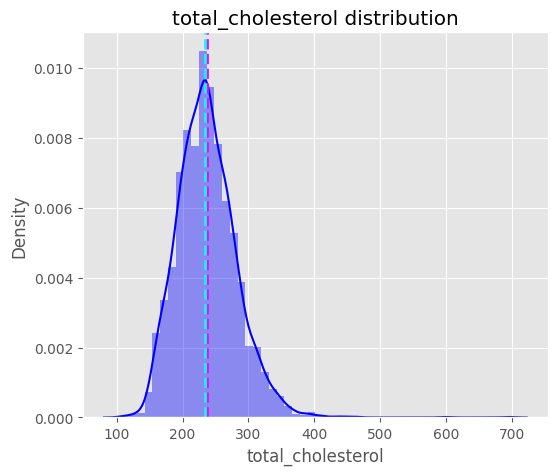

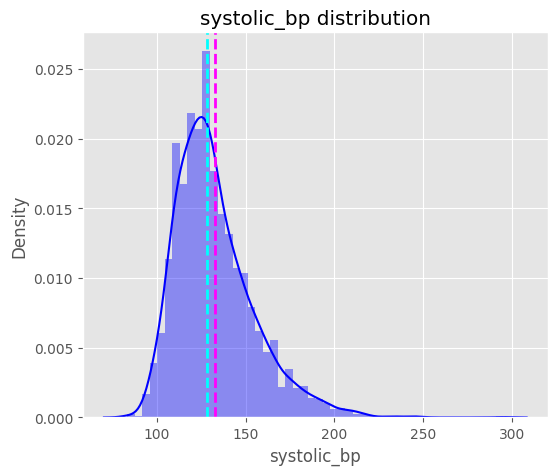

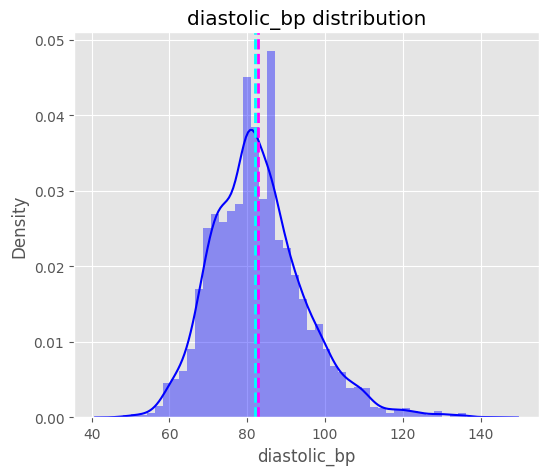

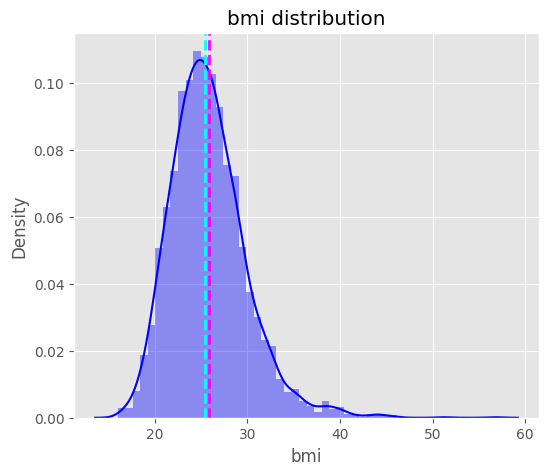

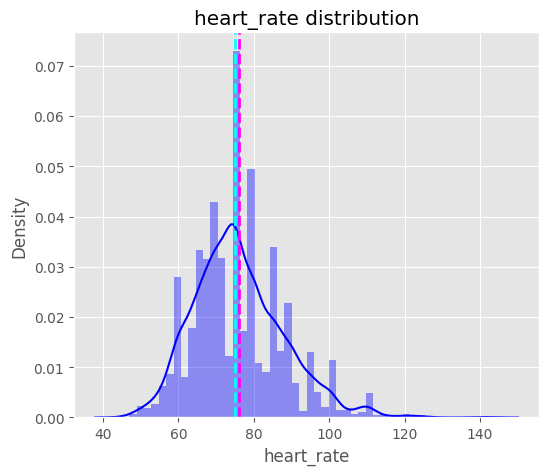

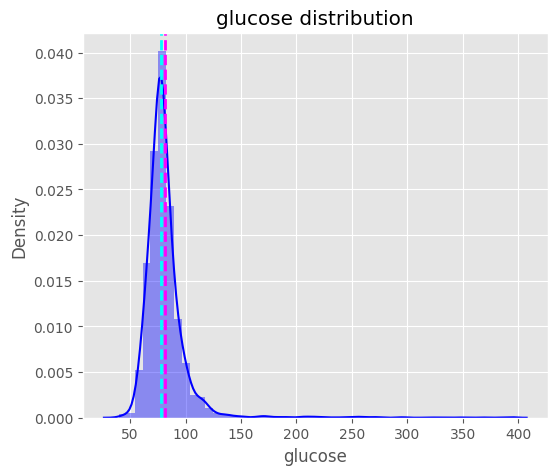

In [267]:
# Chart - 2 visualization code
for col in continous_columns:
  fig, ax = plt.subplots(figsize=(6,5))
  sns.distplot(df[col], ax=ax , color="blue")
  ax.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col+' distribution')
  plt.show()


##### 1. Why did you pick the specific chart?

A distplot chart helps us to examine the density of data and calculate the mean of a data column. When a distribution is skewed, the mean and median become skewed as well. In fact, skewed features can tug on both the mean and median, causing them to lean towards the side of the skewness. there we have picked this dist plot to analyze the distribution of numerical columns

##### 2. What is/are the insight(s) found from the chart?

The distribution plots reveal that Glucose and total_cholesterol are highly right skewed, cigsPerDay, sysBP, and BMI are moderately right skewed, while Ages, diaBP, and heartRate are somewhat normally distributed.





##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

this gained insights help creating a positive business impact  insights, specifically how the data is distributed across various features. This information can be useful for decision making in areas such as marketing, resource allocation, and risk assessment. For example, knowing that a particular variable is highly right-skewed may indicate that the distribution of customers in a certain age group is heavily skewed towards a particular range, which could inform targeted marketing efforts. Similarly, understanding the distribution of risk factors such as blood pressure and cholesterol levels could inform decisions around health insurance premiums or other health-related policies.

#### Chart - 3

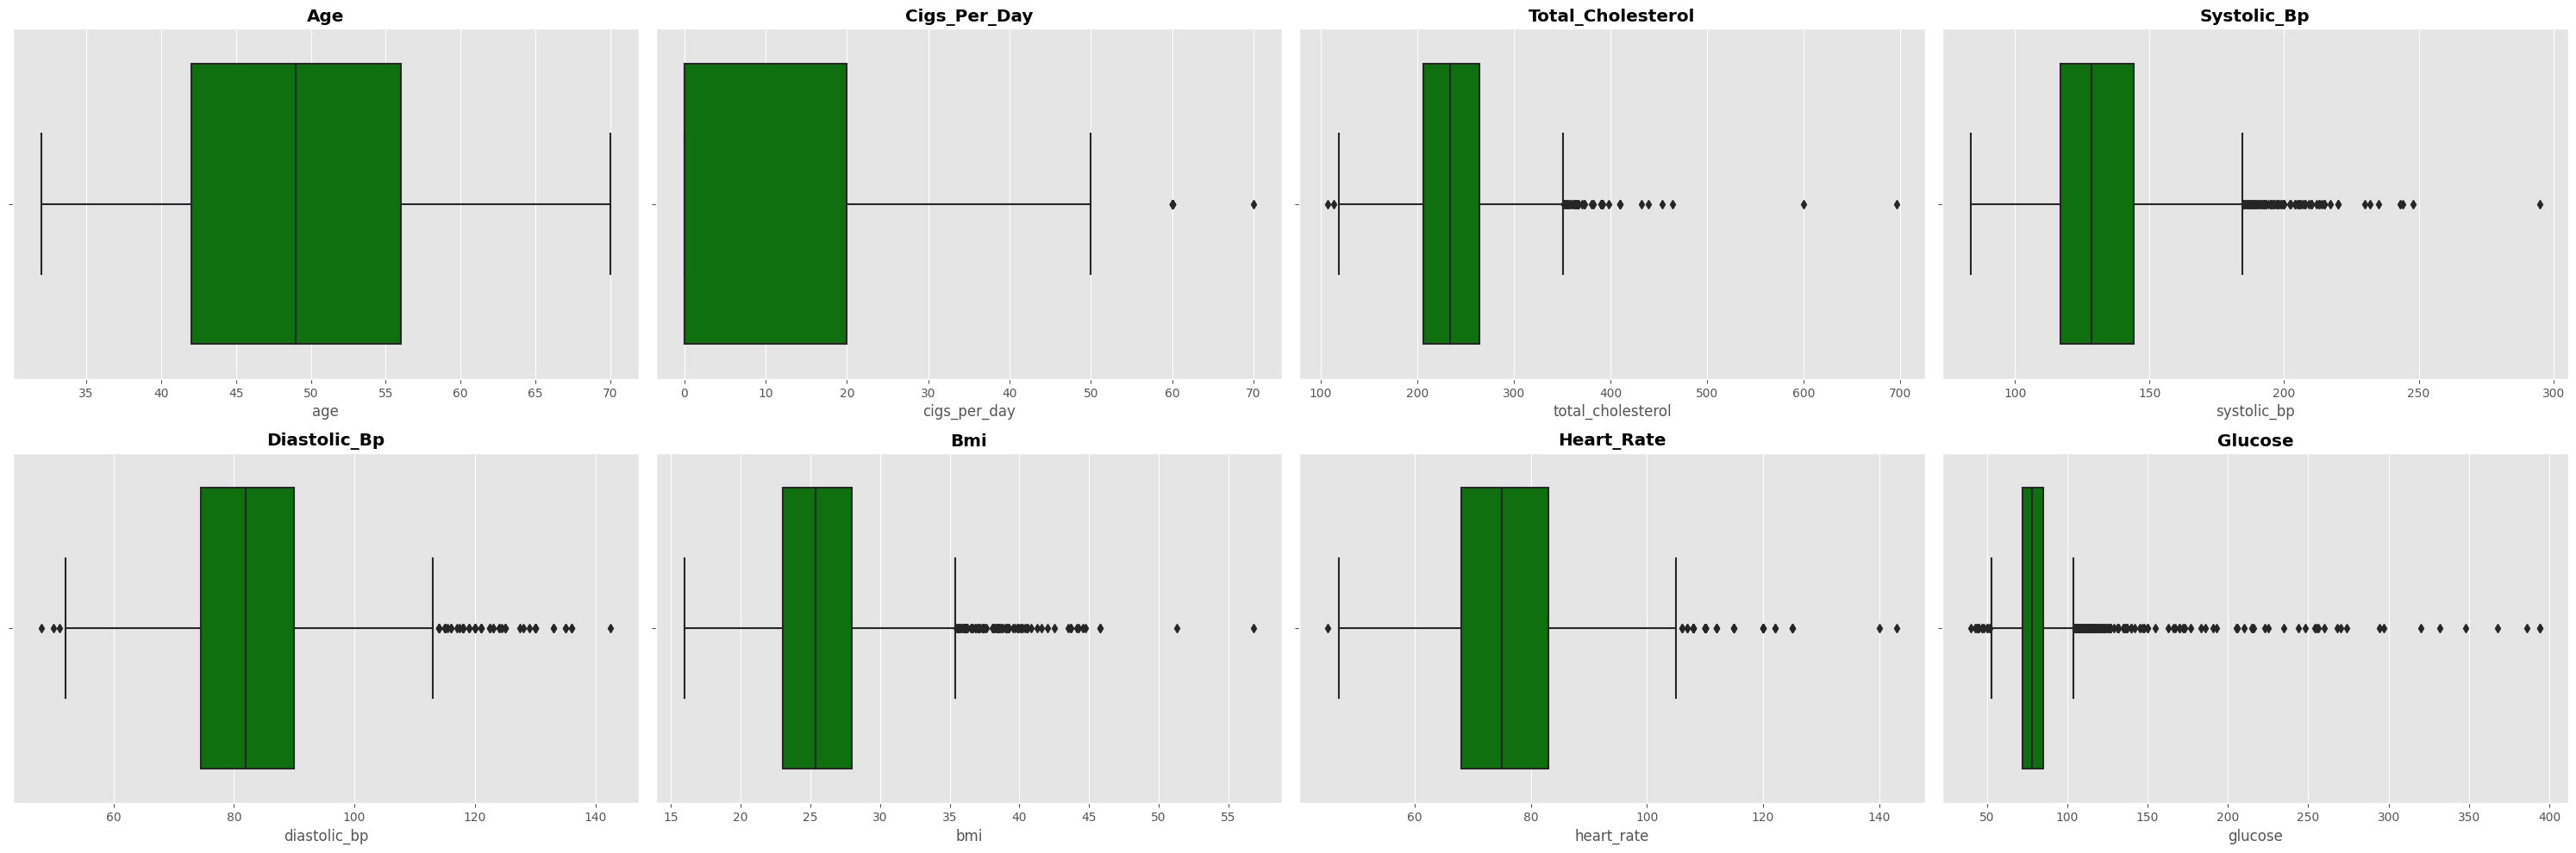

In [155]:
# Chart - 3 visualization code
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(30, 10))

for i, ax in enumerate(axs.flatten()):
    if i >= len(continous_columns):
        break
    column = continous_columns[i]
    sns.boxplot(x=df[column], ax=ax, color='green')
    ax.set_title(column.title(), weight='bold')

plt.tight_layout()


##### 1. Why did you pick the specific chart?

There we have picked the boxplot to analyze the outlier.

##### 2. What is/are the insight(s) found from the chart?

The box plots clearly show that some of the continuous features, including CigsPerDay, total_cholesterol, systolic_bp, diastolic_bp, bmi, heartRate, and glucose, have outliers that may affect the distribution of the data.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

####**Analyzing Categorical features:**

In [156]:
Categorical_columns = ['education', 'sex', 'is_smoking', 'bp_meds', 'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'ten_year_CHD']

#### Chart - 4

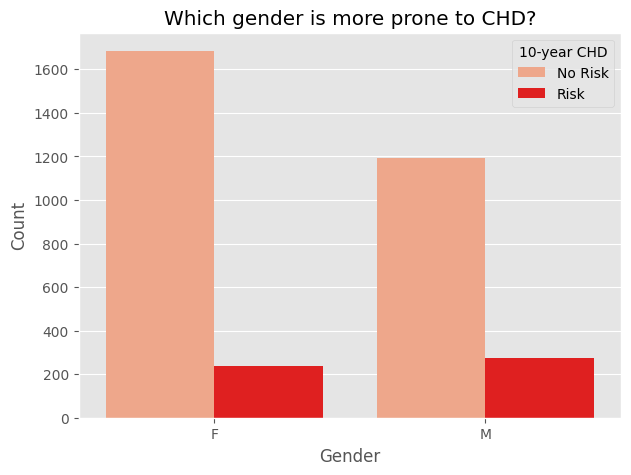

In [270]:
# Chart - 4 visualization code
# Define color palette using RGB values or named colors
my_palette = ["#FFA07A", "red"]
# Create a figure with a custom size
fig, ax = plt.subplots(figsize=(7,5))
# Use Seaborn's countplot function to plot the data
sns.countplot(data=df, x="sex", hue="ten_year_CHD", palette=my_palette, ax=ax)

# Set custom labels and title for the plot
ax.set_xlabel("Gender")
ax.set_ylabel("Count")
ax.set_title("Which gender is more prone to CHD?")

# Customize legend labels
legend_labels = ["No Risk", "Risk"]
ax.legend(legend_labels, title="10-year CHD")
# Show the plot
plt.show()



##### 1. Why did you pick the specific chart?

We used a bar count plot to analyse which gender consumes more cigarettes there.

##### 2. What is/are the insight(s) found from the chart?

It is evident from the plot that there are more entries for females (0) than males (1), indicating a slight bias towards the female population. Therefore, the model may perform better in predicting outcomes for female patients. Additionally, the data suggests that a slightly higher proportion of females smoke compared to males. Slightly more males are suffering from Cardiovascular heart disease than females.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

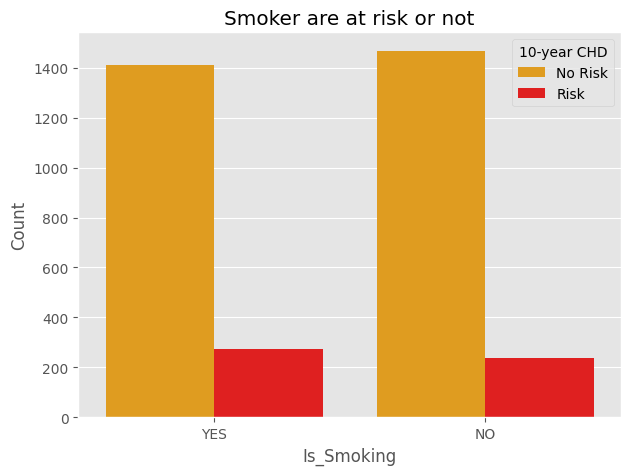

In [274]:
# Define color palette using RGB values or named colors
my_palette = ["orange", "red"]
# Create a figure with a custom size
fig, ax = plt.subplots(figsize=(7, 5))
# Use Seaborn's countplot function to plot the data
sns.countplot(data=df, x="is_smoking", hue="ten_year_CHD", palette=my_palette, ax=ax)

# Set custom labels and title for the plot
ax.set_xlabel("Is_Smoking")
ax.set_ylabel("Count")
ax.set_title("Smoker are at risk or not")
# Customize legend labels
legend_labels = ["No Risk", "Risk"]
ax.legend(legend_labels, title="10-year CHD")
# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

To investigate who is more at risk—smokers or non-smokers—we have chosen this plot.

##### 2. What is/are the insight(s) found from the chart?

Based on this plot, we can infer that individuals who do not smoke have a slightly lower risk of being diagnosed with CHD over a 10-year period compared to smokers. The data indicates that there are almost equal numbers of smokers and non-smokers, with both groups consisting of around 1600 individuals. Furthermore, the plot suggests that the prevalence of CHD is similar in both smokers and non-smokers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [159]:
df["bp_meds"].value_counts()

0.0    3290
1.0     100
Name: bp_meds, dtype: int64

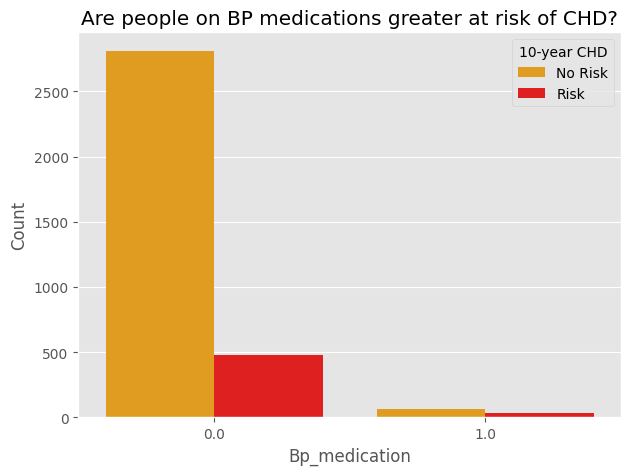

In [275]:
# Chart - 6 visualization code
# Define color palette using RGB values or named colors
my_palette = ["orange", "red"]
# Create a figure with a custom size
fig, ax = plt.subplots(figsize=(7, 5))
# Use Seaborn's countplot function to plot the data
sns.countplot(data=df, x="bp_meds", hue="ten_year_CHD", palette=my_palette, ax=ax)

# Set custom labels and title for the plot
ax.set_xlabel("Bp_medication")
ax.set_ylabel("Count")
ax.set_title("Are people on BP medications greater at risk of CHD?")
# Customize legend labels
legend_labels = ["No Risk", "Risk"]
ax.legend(legend_labels, title="10-year CHD")
# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

We chose this plot to investigate the question, Are those taking BP drugs more likely to develop CHD?

##### 2. What is/are the insight(s) found from the chart?

Out of the 3390 patients under study, 100 individuals are taking blood pressure medication while the remaining 3290 are not. The graph suggests that while the count of patients taking BP medication is higher, the majority of them have a lower chance of CHD, with only a few at risk. Interestingly, the number of individuals taking BP medication who are at risk of CHD is higher than those who are not taking medication.

#### Chart - 7

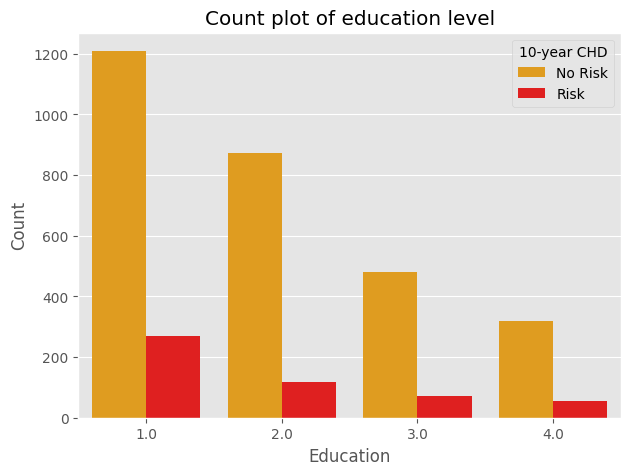

In [276]:
# Chart - 7 visualization code

# Define color palette using RGB values or named colors
my_palette = ["orange", "red"]
# Create a figure with a custom size
fig, ax = plt.subplots(figsize=(7, 5))
# Use Seaborn's countplot function to plot the data
sns.countplot(data=df, x="education", hue="ten_year_CHD", palette=my_palette, ax=ax)

# Set custom labels and title for the plot
ax.set_xlabel("Education")
ax.set_ylabel("Count")
ax.set_title("Count plot of education level")
# Customize legend labels
legend_labels = ["No Risk", "Risk"]
ax.legend(legend_labels, title="10-year CHD")
# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?Answer Here

The majority of patients in the study have an education level of 1, followed by levels 2, 3, and 4, respectively, with approximately 1500 individuals falling into the education level 1 category and around 400 individuals having an education level of 4.Interestingly, the patients in the education level 1 category are at a higher risk of CHD compared to the other education levels.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [162]:
df["prevalent_stroke"].value_counts()

0    3368
1      22
Name: prevalent_stroke, dtype: int64

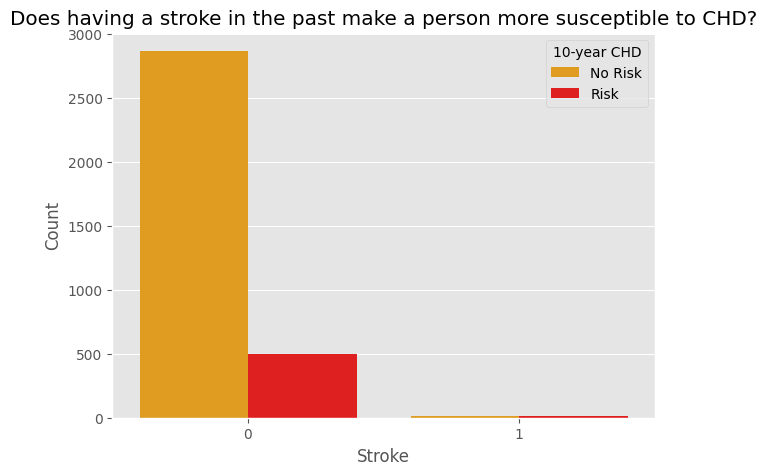

In [277]:
# Chart - 8 visualization code
# Define color palette using RGB values or named colors
my_palette = ["orange", "red"]
# Create a figure with a custom size
fig, ax = plt.subplots(figsize=(7, 5))
# Use Seaborn's countplot function to plot the data
sns.countplot(data=df, x="prevalent_stroke", hue="ten_year_CHD", palette=my_palette, ax=ax)

# Set custom labels and title for the plot
ax.set_xlabel("Stroke")
ax.set_ylabel("Count")
ax.set_title("Does having a stroke in the past make a person more susceptible to CHD?")
# Customize legend labels
legend_labels = ["No Risk", "Risk"]
ax.legend(legend_labels, title="10-year CHD")
# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

There, we have chosen that plot to analyze . Does having had a stroke in the past increase one's risk of developing CHD?

##### 2. What is/are the insight(s) found from the chart?

As we are seeing in the plot that there are only 22 patients who have previously experienced a stroke, and a significant number of individuals (501) who are at risk of CHD have not yet had a stroke. This small number of stroke patients could potentially cause a significant bias in the model's predictions, favoring those who have not experienced a stroke in the past.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [164]:
df['diabetes'].value_counts()

0    3303
1      87
Name: diabetes, dtype: int64

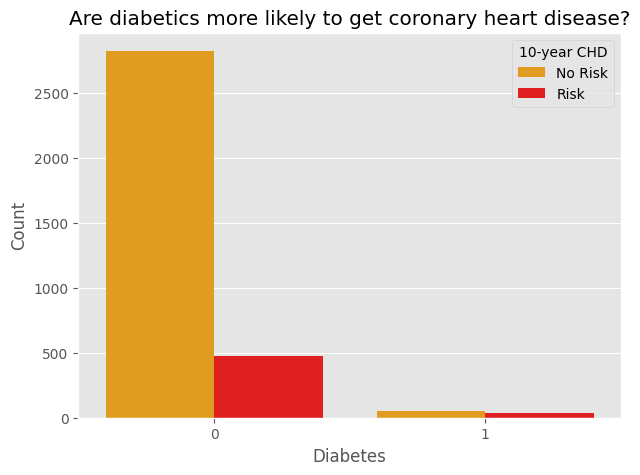

In [278]:
# Chart - 9 visualization code
# Define color palette using RGB values or named colors
my_palette = ["orange", "red"]
# Create a figure with a custom size
fig, ax = plt.subplots(figsize=(7, 5))
# Use Seaborn's countplot function to plot the data
sns.countplot(data=df, x="diabetes", hue="ten_year_CHD", palette=my_palette, ax=ax)

# Set custom labels and title for the plot
ax.set_xlabel("Diabetes")
ax.set_ylabel("Count")
ax.set_title("Are diabetics more likely to get coronary heart disease?")
# Customize legend labels
legend_labels = ["No Risk", "Risk"]
ax.legend(legend_labels, title="10-year CHD")
# Show the plot
plt.show()



##### 1. Why did you pick the specific chart?

We chose this plot to anlyze  that, Are diabetics more prone to get coronary heart disease?

##### 2. What is/are the insight(s) found from the chart?

As we are seeing that the dataset includes a large number of individuals (> 3000) who do not have diabetes, with only 87 patients having diabetes. The graph shows a significant difference in the number of diabetic and non-diabetic patients with those without diabetes being at higher risk of CHD. However, the dataset is biased towards individuals without diabetes, as the number of diabetic patients is considerably lower.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [166]:
df['prevalent_hyp'].value_counts()

0    2321
1    1069
Name: prevalent_hyp, dtype: int64

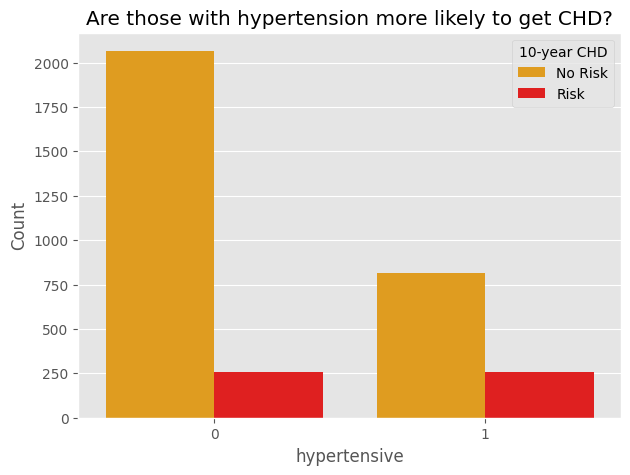

In [279]:
# Chart - 10 visualization code
# Define color palette using RGB values or named colors
my_palette = ["orange", "red"]
# Create a figure with a custom size
fig, ax = plt.subplots(figsize=(7, 5))
# Use Seaborn's countplot function to plot the data
sns.countplot(data=df, x="prevalent_hyp", hue="ten_year_CHD", palette=my_palette, ax=ax)

# Set custom labels and title for the plot
ax.set_xlabel("hypertensive")
ax.set_ylabel("Count")
ax.set_title("Are those with hypertension more likely to get CHD?")
# Customize legend labels
legend_labels = ["No Risk", "Risk"]
ax.legend(legend_labels, title="10-year CHD")
# Show the plot
plt.show()



##### 1. Why did you pick the specific chart?

We used this plot to investigate if people with hypertension had a higher risk of developing CHD.

##### 2. What is/are the insight(s) found from the chart?

The dataset contains 1069 patients with hypertension, with the plot indicating a higher count of hypertensive patients than non-hypertensive patients. However, upon closer inspection, patients with prevalent hypertension are at higher risk of CHD. Therefore, individuals with hypertension have a greater risk of cardiovascular heart disease compared to those who do not have hypertension.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

###Bivariate Analysis

#### Chart - 11

In [168]:
encoder = {'sex':{'M':1, 'F':0},'is_smoking':{'YES':1, 'NO': 0}}

# Label Encoding
df_copied = df.replace(encoder)

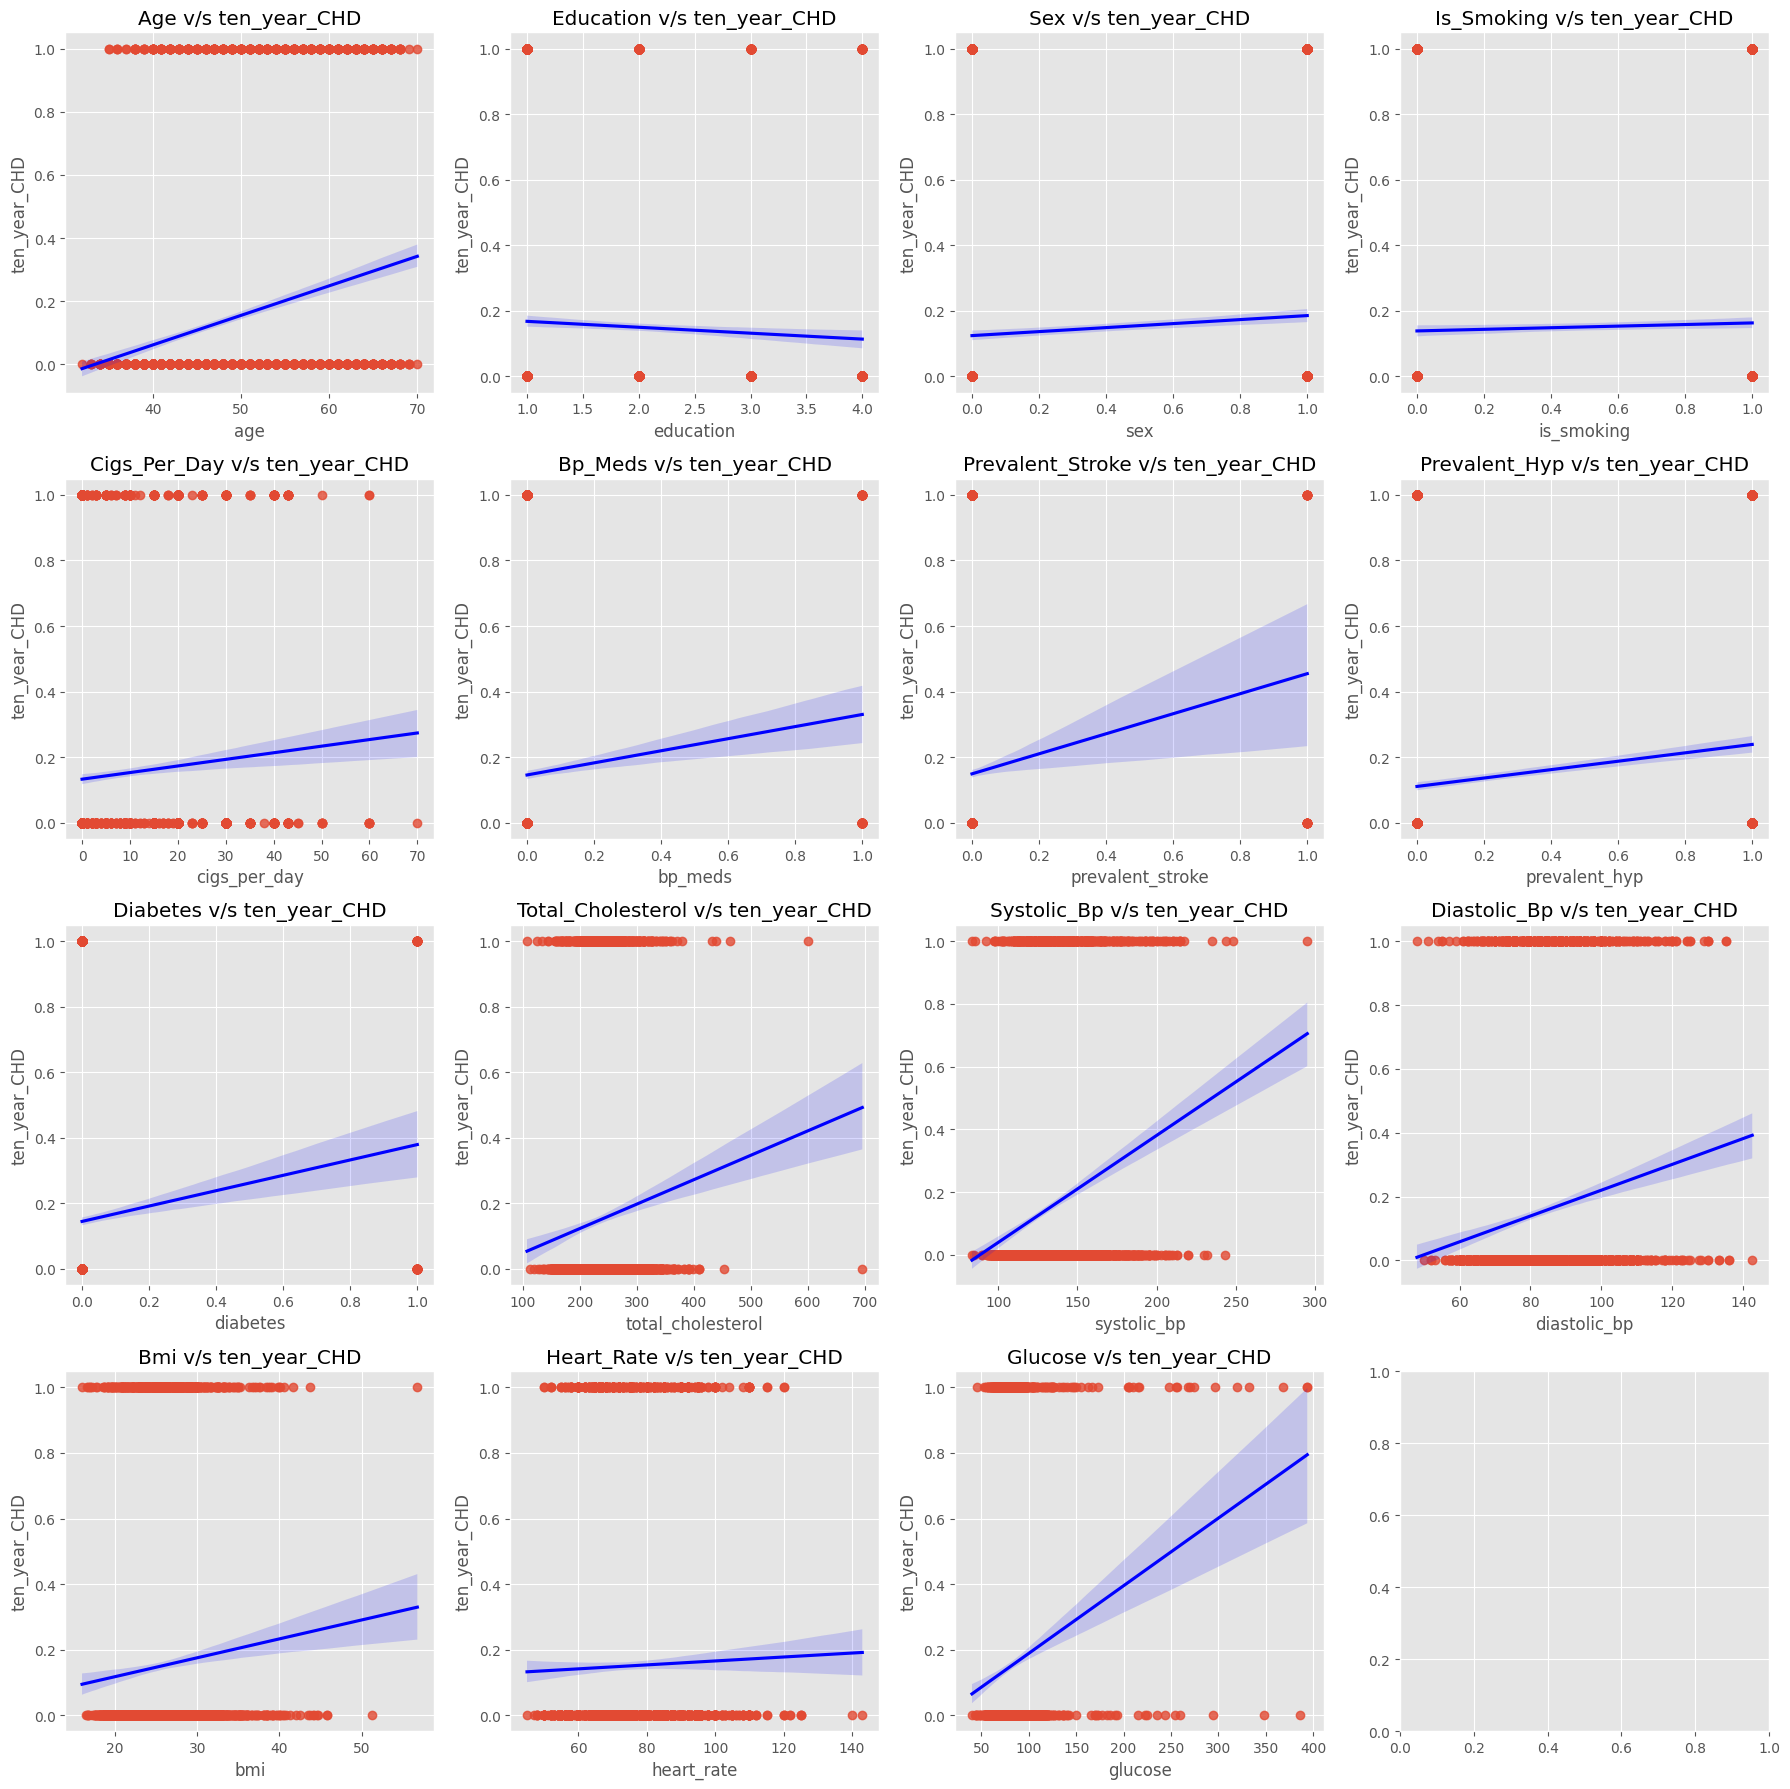

In [169]:
# Chart - 11 visualization code
# Define figure and subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 18))
axes = axes.flatten()

# Loop through all columns and plot against TenYearCHD
for i, column in enumerate(df_copied.columns[:-1]):
    sns.regplot(x=df_copied[column], y=df_copied['ten_year_CHD'], ax=axes[i], line_kws={"color": "blue"})
    axes[i].set_title(f'{column.title()} v/s ten_year_CHD', weight='light')

# Adjust subplot spacing
plt.tight_layout()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

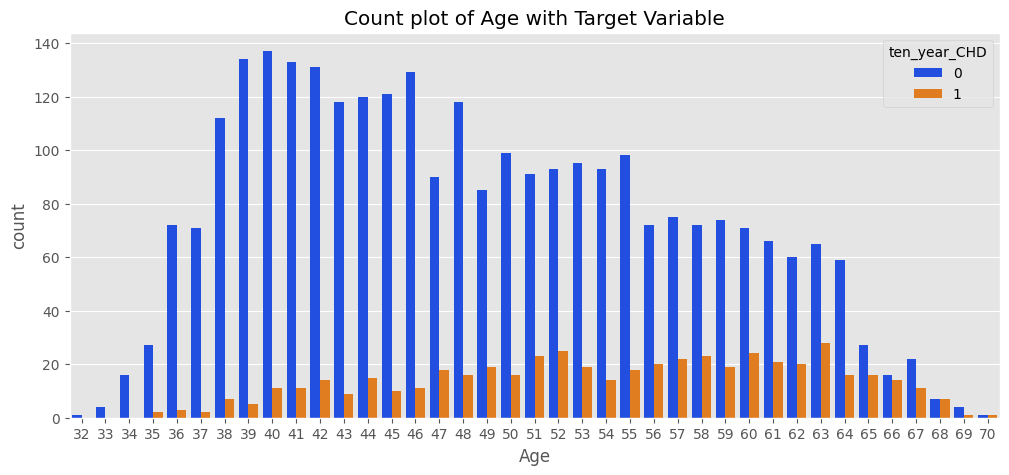

In [116]:
# Chart - 12 visualization code
# Define figure and subplots
fig, ax = plt.subplots(figsize=(12,5))

# Plot count plot of age with target variable
sns.countplot(x='age', hue='ten_year_CHD', data=df, ax=ax, palette='bright')
# Set axis labels and title
ax.set_xlabel('Age')
ax.set_title('Count plot of Age with Target Variable')
# Show plot
plt.show()


##### 1. Why did you pick the specific chart?

Now, we have used this count plot to determine the age at which CHD risk is highest.

##### 2. What is/are the insight(s) found from the chart?

The graph indicates a lower likelihood of CHDs between the ages of 32 to 40, followed by an increase in risk after the age of 40, with the highest chance of CHDs occurring between 51 to 63, and a subsequent decrease in risk as age advances beyond 63.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here



#### Chart - 13

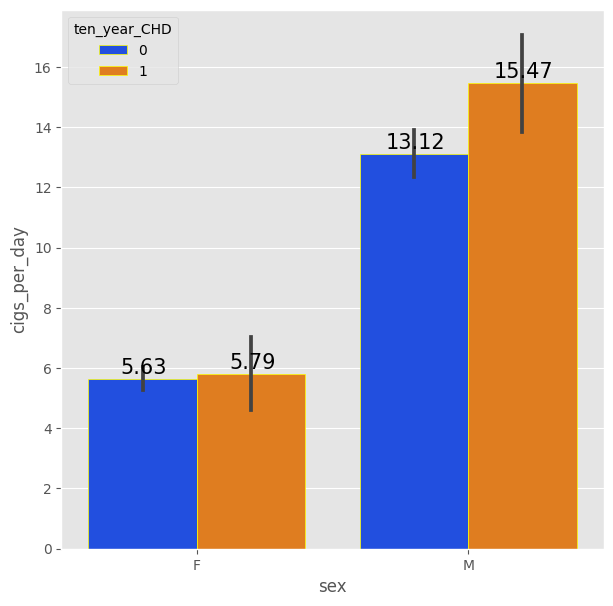

In [281]:
# Chart -13 visualization code
plt.figure(figsize=(7,7))
plots=sns.barplot(x=df['sex'],y=df['cigs_per_day'],hue=df['ten_year_CHD'],edgecolor='yellow' , palette='bright')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(1, 8),
                   textcoords='offset points')
plt.show()
     

##### 1. Why did you pick the specific chart?

Now, we've used this plot to examine whether men or women consume a greater number of cigarettes. 

##### 2. What is/are the insight(s) found from the chart?

Based on the individual analysis, it can be concluded that although the number of entries by females is higher than males, the proportion of male smokers is greater than that of females , means that males are smoking more number of ciggerets than female. This indicates that males are at a higher risk of CHD compared to females. Specifically, there are 828 male smokers who smoke at least one cigarette a day, while there are 652 female smokers who smoke at least one cigarette a day. Furthermore, the number of males consuming cigarettes is higher than that of females.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

[Text(0.5, 0, 'age'),
 Text(1.5, 0, 'education'),
 Text(2.5, 0, 'cigs_per_day'),
 Text(3.5, 0, 'bp_meds'),
 Text(4.5, 0, 'prevalent_stroke'),
 Text(5.5, 0, 'prevalent_hyp'),
 Text(6.5, 0, 'diabetes'),
 Text(7.5, 0, 'total_cholesterol'),
 Text(8.5, 0, 'systolic_bp'),
 Text(9.5, 0, 'diastolic_bp'),
 Text(10.5, 0, 'bmi'),
 Text(11.5, 0, 'heart_rate'),
 Text(12.5, 0, 'glucose'),
 Text(13.5, 0, 'ten_year_CHD')]

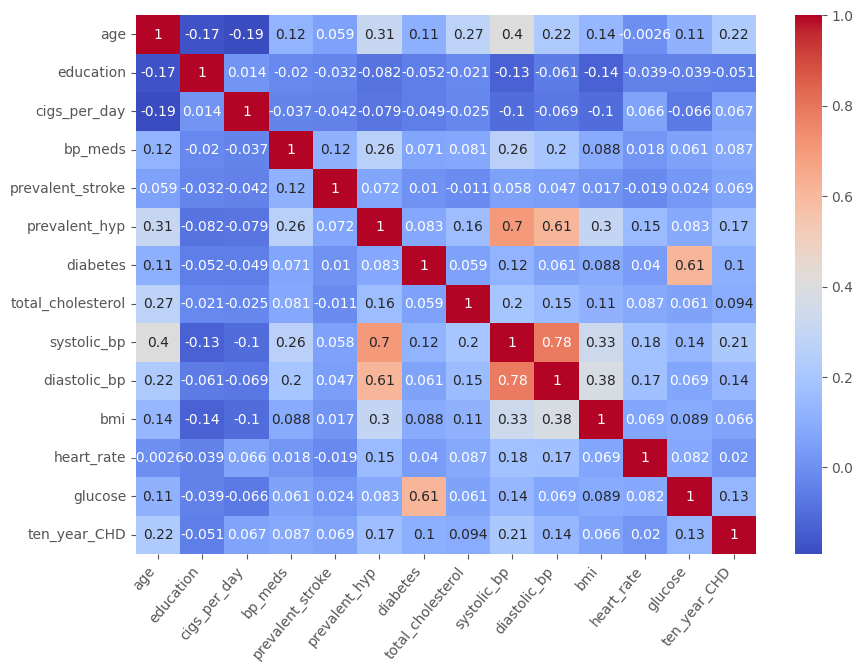

In [284]:
# Correlation Heatmap visualization code
plt.figure(figsize= (10,7))
corr = sns.heatmap(df.corr(), annot = True, cmap='coolwarm')
corr.set_xticklabels(corr.get_xticklabels(),horizontalalignment='right',  rotation=50 )

##### 1. Why did you pick the specific chart?

There we have picked this chart to check the correlation between the variables .

##### 2. What is/are the insight(s) found from the chart?



* Systolic blood pressure correlates most strongly with diastolic blood pressure.
* BMI and hypertension are influenced by systolic and diastolic BP.

*   Age and systolic blood pressure have a favourable correlation.
*   The risk of heart disease is mostly influenced by factors like age, existing hypertension, systolic and diastolic blood pressure, and blood sugar levels.
*   All the variables, with the exception of education, exhibit a minor but positive connection with the dependent variable.










##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 15 - Pair Plot 

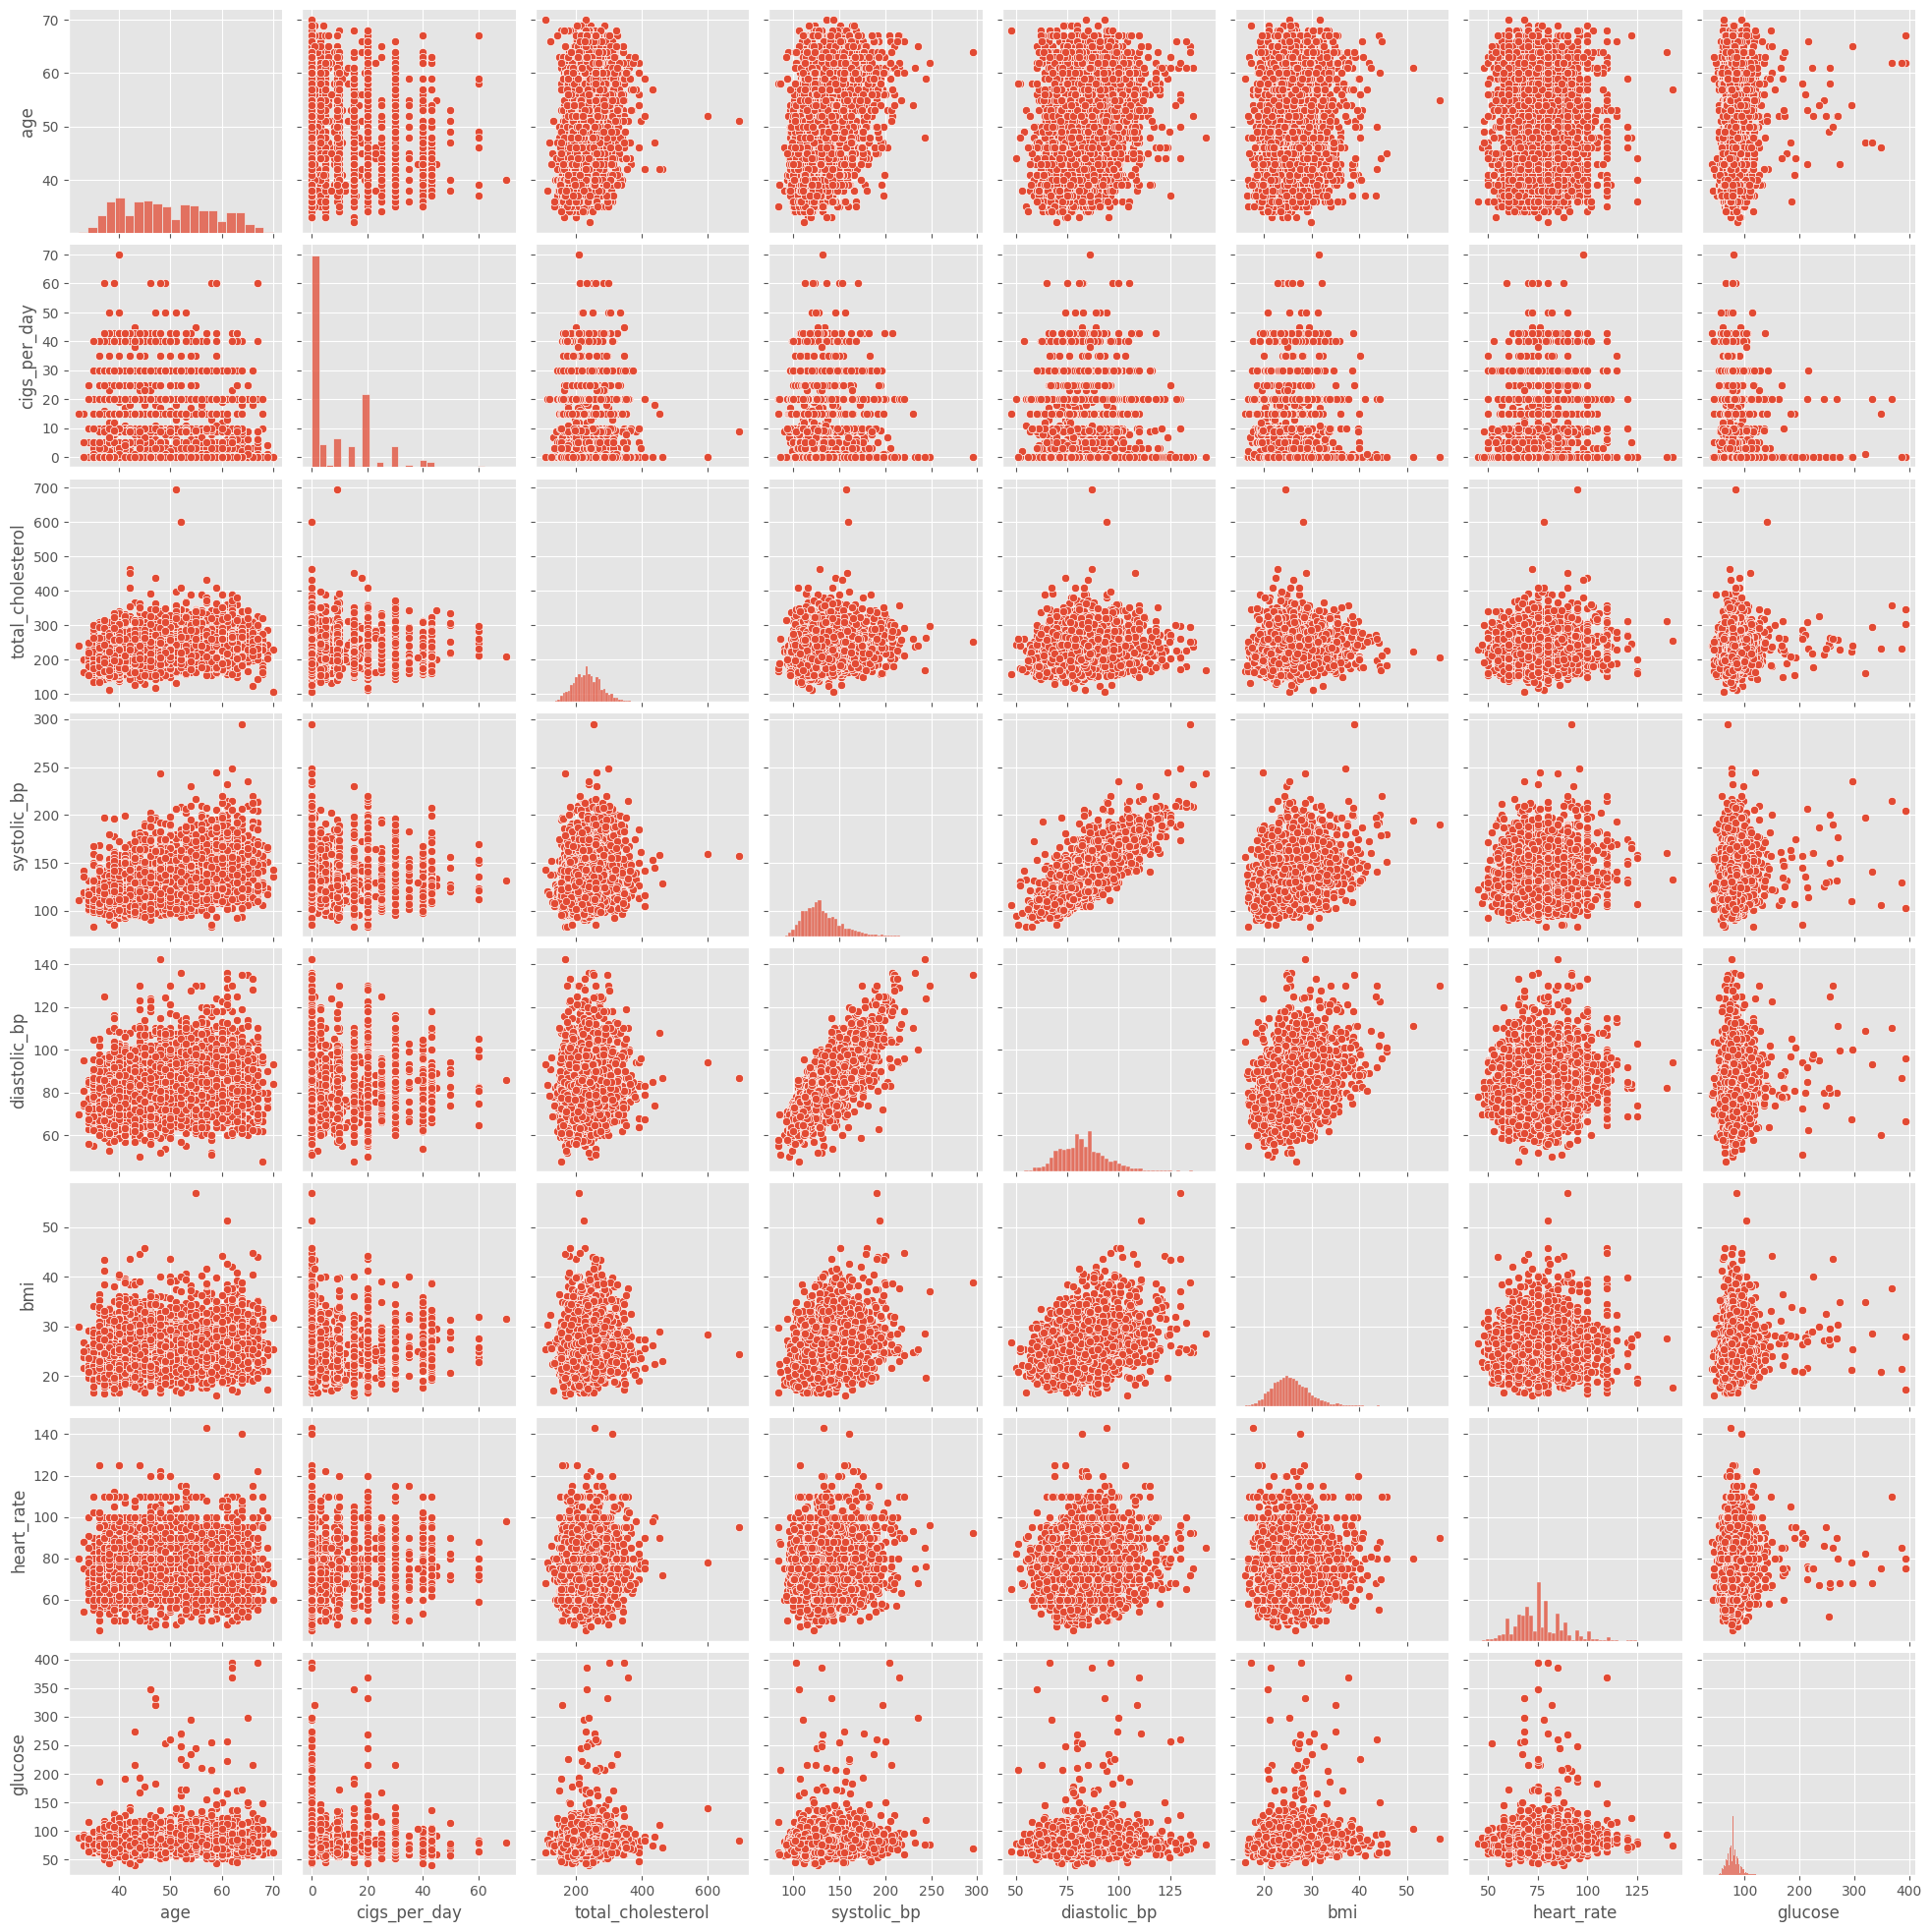

In [170]:
# Pair Plot visualization code
sns.pairplot(df[continous_columns])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

From the data, it is clear that both healthy and unwell people are taken into account because of the wide range of figures. All of these categories are crucial for understanding heart disease risk, but those at the higher end are particularly significant because they may increase a person's susceptibility to the condition.



* Systolic blood pressure stays low because cholesterol is low.
*   Positive correlation exists between systolic and diastolic blood pressure.
*   Less cholesterol typically equates to less glucose.
*   BMI and the diastolic, systolic, and blood pressure variables are positively correlated.



## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

For various cases, we have many statistical tests:




*  One proportion test -> One categorical feature
*  More than two category in categorical features -> ANOVA test
*  One numerical and one categorical(=2 categories) feature-> ANOVA test
*   Two numerical feature -> Corelation test
*   One numerical feature -> T-test
*   Chi-squared test for two category features
*  One numerical and one categorical(>2 categories) feature -> T-test
*   One numerical and one categorical(=2 categories) feature-> ANOVA test









1- Null Hypothesis - 1: Null Hypothesis: Diabetes and Ten-Year CHD are unrelated.

Alternate Hypothesis - There is a relation between diabetes and TenYearCHD

2- Null Hypothesis -Age is a significant risk factor for cardiovascular diseases(CHD)

Alternate Hypothesis - Cardiovascular(CHD) risks are not correlated with age.

3- Null Hypothesis - There is no relation between age and TenYearCHD

Alternate Hypothesis - There is a relationship between age and TenYearCHD

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

1- Null Hypothesis - 1: Null Hypothesis: Diabetes and Ten-Year CHD are unrelated.

Alternate Hypothesis - There is a relation between diabetes and TenYearCHD

#### 2. Perform an appropriate statistical test.

In [171]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['diabetes'], df['ten_year_CHD'])

# Perform the chi-square test and obtain the p-value
chi2_statistic, p_value, dof, expected_values = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_statistic)
print("Degrees of freedom:", dof)
print("p-value:", p_value)

# Interpret the results based on p-value
if p_value > 0.05:
    print("There is insufficient evidence to reject the null hypothesis.")
else:
    print("There is sufficient evidence to reject the null hypothesis.")


Chi-square statistic: 34.63203270914867
Degrees of freedom: 1
p-value: 3.982978687382329e-09
There is sufficient evidence to reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

**Chi Square Test**

##### Why did you choose the specific statistical test?

The p-value is greater than 0.05, therefore we fail to reject the null hypothesis, which means that there is insufficient evidence to conclude that there is a significant relationship between diabetes and ten-year CHD.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

2- Null Hypothesis -Age is a significant risk factor for cardiovascular diseases(CHD)

Alternate Hypothesis - Cardiovascular(CHD) risks are not correlated with age.

#### 2. Perform an appropriate statistical test.

In [172]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['age'], df['ten_year_CHD'])

# Perform the chi-square test and obtain the p-value
chi2_statistic, p_value, dof, expected_values = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_statistic)
print("Degrees of freedom:", dof)
print("p-value:", p_value)

# Interpret the results based on p-value
if p_value < 0.05:
    print("There is insufficient evidence to reject the null hypothesis.")
else:
    print("There is sufficient evidence to reject the null hypothesis.")


Chi-square statistic: 205.2255233856175
Degrees of freedom: 38
p-value: 8.20034951967931e-25
There is insufficient evidence to reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

**Chi Square Test**

##### Why did you choose the specific statistical test?

The chi-square test was used to investigate the association between the 'age' and 'TenyearCHD' variables. The results of the test indicate that there is not enough evidence to suggest that these variables have a significant impact on each other, therefore we failed to reject the null hypothesis.'

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



3- Null Hypothesis(H0) - Mean total cholesterin levels are 237 

Alternative Hypothesis(H1) - mean total cholesterin levels are!= 237

#### 2. Perform an appropriate statistical test.

In [173]:
from scipy import stats
from statsmodels.stats import weightstats as stests

# Define the first sample and specify the null hypothesis value
sample = df['total_cholesterol']
null_value = 237

# Perform a one-sample z-test and obtain the p-value
z_statistic, p_value = stests.ztest(sample, x2=None, value=null_value)

# Print the p-value and interpret the results based on alpha=0.05
alpha = 0.05
print("p-value:", p_value)
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


p-value: 0.9589015715213028
Fail to reject the null hypothesis


##### Which statistical test have you done to obtain P-Value?

**Z-Test**  . The z-test assumes that the data points are independent and normally distributed, and since this assumption holds true in our case, we can conclude that the mean of 'totChol' is not significantly different from the null hypothesis value.

##### Why did you choose the specific statistical test?

The null hypothesis in this one-sample z-test is that the mean of the 'totChol' variable is equal to the null hypothesis value of 237. Based on the z-test, we found that there is not enough evidence to suggest that the mean is significantly different from 237, which means that we failed to reject the null hypothesis

## ***6. Feature Engineering & Data Pre-processing***




### 1. Handling Missing Values

In [174]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

age                  0
education            0
sex                  0
is_smoking           0
cigs_per_day         0
bp_meds              0
prevalent_stroke     0
prevalent_hyp        0
diabetes             0
total_cholesterol    0
systolic_bp          0
diastolic_bp         0
bmi                  0
heart_rate           0
glucose              0
ten_year_CHD         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

By creating a box plot, we were able to identify any outliers. Next, we replaced any null values for the different variables with the mean, median, mode, and 0 if appropriate.

### 2. Handling Outliers

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3390 non-null   int64  
 1   education          3390 non-null   float64
 2   sex                3390 non-null   object 
 3   is_smoking         3390 non-null   object 
 4   cigs_per_day       3390 non-null   float64
 5   bp_meds            3390 non-null   float64
 6   prevalent_stroke   3390 non-null   int64  
 7   prevalent_hyp      3390 non-null   int64  
 8   diabetes           3390 non-null   int64  
 9   total_cholesterol  3390 non-null   float64
 10  systolic_bp        3390 non-null   float64
 11  diastolic_bp       3390 non-null   float64
 12  bmi                3390 non-null   float64
 13  heart_rate         3390 non-null   float64
 14  glucose            3390 non-null   float64
 15  ten_year_CHD       3390 non-null   int64  
dtypes: float64(9), int64(5),

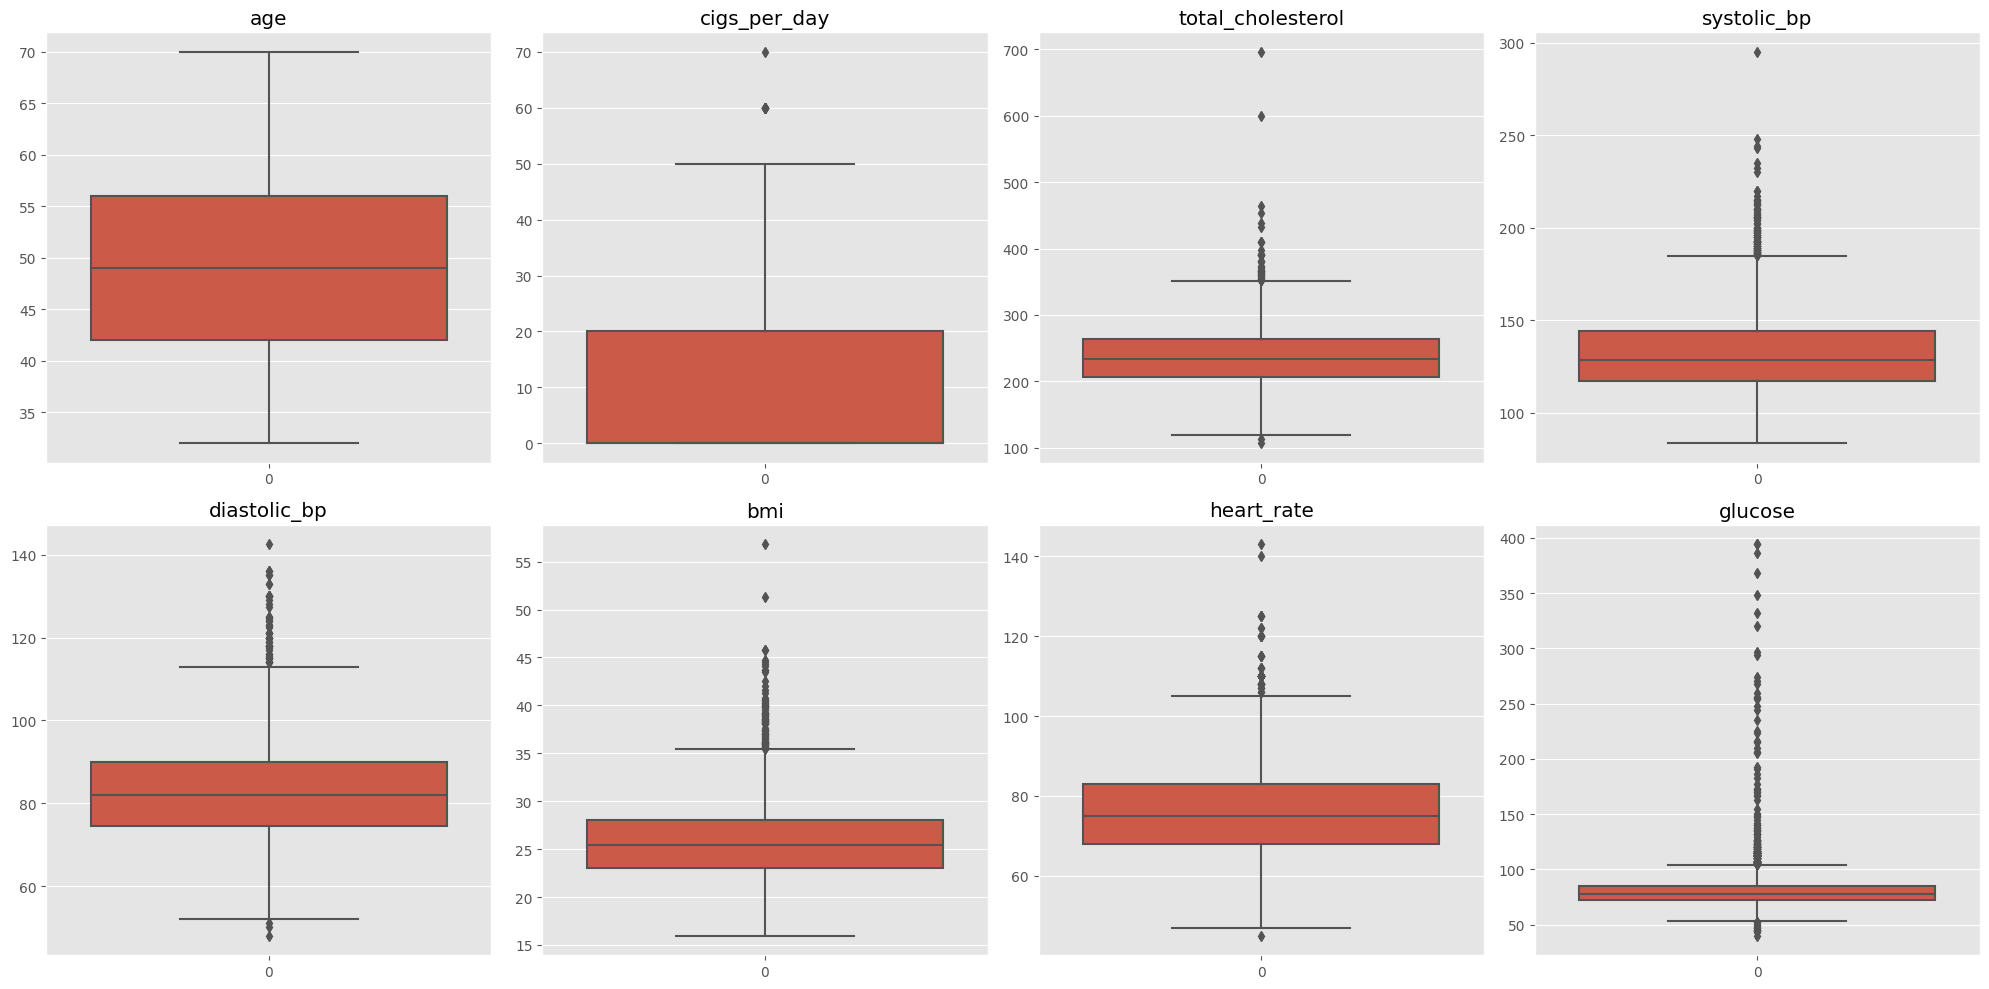

In [286]:
# Handling Outliers & Outlier treatments
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,10))
for i, ax in zip(continous_columns, axes.flatten()):
    sns.boxplot(df[i], ax=ax)
    ax.set_title(i)
plt.tight_layout()


**Let's build a function to determine the percentage and quantity of outliers present in each feature so that we can manage them appropriately.**

In [287]:
##using IQR to define the code for outlier detection and percentage.
def detect_outliers(bike_df):
    data = sorted(bike_df)
    q1, q2, q3 = np.percentile(data, [25, 50, 75])
    print(f"q1:{q1}, q2:{q2}, q3:{q3}")
    IQR = q3 - q1
    lower_bound, upper_bound = q1 - 1.5*IQR, q3 + 1.5*IQR
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}, IQR: {IQR}")
    

    outliers = [i for i in data if i < lower_bound or i > upper_bound]
    num_outliers = len(outliers)
    perc_outliers = round(num_outliers * 100 / len(data), 2)
    print(f"Total number of outliers are: {num_outliers}")
    print(f"Total percentage of outlier is: {round(perc_outliers*100/len(data),2)} %")
    

    results = (
        q1, q2, q3,
        IQR,
        lower_bound, upper_bound,
        outliers,
        num_outliers,
        perc_outliers
    )
    return results




In [288]:
# Determining IQR, Lower and Upper bound and number out outliers present in each of the continous numerical feature
for feature in continous_columns:
  print(feature,":")
  detect_outliers(df[feature])
  print("-"*50)

age :
q1:42.0, q2:49.0, q3:56.0
Lower bound: 21.0, Upper bound: 77.0, IQR: 14.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %
--------------------------------------------------
cigs_per_day :
q1:0.0, q2:0.0, q3:20.0
Lower bound: -30.0, Upper bound: 50.0, IQR: 20.0
Total number of outliers are: 9
Total percentage of outlier is: 0.01 %
--------------------------------------------------
total_cholesterol :
q1:206.0, q2:234.0, q3:264.0
Lower bound: 119.0, Upper bound: 351.0, IQR: 58.0
Total number of outliers are: 43
Total percentage of outlier is: 0.04 %
--------------------------------------------------
systolic_bp :
q1:117.0, q2:128.5, q3:144.0
Lower bound: 76.5, Upper bound: 184.5, IQR: 27.0
Total number of outliers are: 105
Total percentage of outlier is: 0.09 %
--------------------------------------------------
diastolic_bp :
q1:74.5, q2:82.0, q3:90.0
Lower bound: 51.25, Upper bound: 113.25, IQR: 15.5
Total number of outliers are: 58
Total percentage of outlie

##### What all outlier treatment techniques have you used and why did you use those techniques?

Despite the presence of outliers in our data, we chose not to remove them as our dataset is from the medical domain. We believe that it is crucial to retain all patient details in our dataset, even if they are outliers, to ensure that we have a comprehensive understanding of the data. Hence, we have considered all data points, including the outliers, in our analysis.

### 3. Categorical Encoding

In [289]:
# Encode your categorical columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3390 non-null   int64  
 1   education          3390 non-null   float64
 2   sex                3390 non-null   object 
 3   is_smoking         3390 non-null   object 
 4   cigs_per_day       3390 non-null   float64
 5   bp_meds            3390 non-null   float64
 6   prevalent_stroke   3390 non-null   int64  
 7   prevalent_hyp      3390 non-null   int64  
 8   diabetes           3390 non-null   int64  
 9   total_cholesterol  3390 non-null   float64
 10  systolic_bp        3390 non-null   float64
 11  diastolic_bp       3390 non-null   float64
 12  bmi                3390 non-null   float64
 13  heart_rate         3390 non-null   float64
 14  glucose            3390 non-null   float64
 15  ten_year_CHD       3390 non-null   int64  
dtypes: float64(9), int64(5),

As our dataset contains only two object dtype variables ('sex' and 'is_smoking') with two categories each ('Male' and 'Female', 'No' and 'Yes' respectively), we can easily convert these categorical variables to numerical values using binary label encoding, where '0' represents one category and '1' represents the other. By performing binary label encoding, we can change the dtype of these variables from object to integer, which will make it easier to perform statistical analysis and machine learning tasks on our dataset.

In [290]:
# Encode your categorical columns
df['sex'].replace({'M':0,'F':1},inplace=True)
df['is_smoking'].replace({'NO':0,'YES':1},inplace=True)

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3390 non-null   int64  
 1   education          3390 non-null   float64
 2   sex                3390 non-null   int64  
 3   is_smoking         3390 non-null   int64  
 4   cigs_per_day       3390 non-null   float64
 5   bp_meds            3390 non-null   float64
 6   prevalent_stroke   3390 non-null   int64  
 7   prevalent_hyp      3390 non-null   int64  
 8   diabetes           3390 non-null   int64  
 9   total_cholesterol  3390 non-null   float64
 10  systolic_bp        3390 non-null   float64
 11  diastolic_bp       3390 non-null   float64
 12  bmi                3390 non-null   float64
 13  heart_rate         3390 non-null   float64
 14  glucose            3390 non-null   float64
 15  ten_year_CHD       3390 non-null   int64  
dtypes: float64(9), int64(7)


#### What all categorical encoding techniques have you used & why did you use those techniques?

We have two categorical features—sex and is_smoking—with dtype serving as the object.Since a category feature can only have two possible values, we utilised the label encoding technique to transform the labels into a numeric form that is machine-readable.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [292]:
# Expand Contraction

#### 2. Lower Casing

In [293]:
# Lower Casing

#### 3. Removing Punctuations

In [294]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [295]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [296]:
# Remove Stopwords

In [297]:
# Remove White spaces

#### 6. Rephrase Text

In [298]:
# Rephrase Text

#### 7. Tokenization

In [299]:
# Tokenization

#### 8. Text Normalization

In [300]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [301]:
# POS Taging

#### 10. Text Vectorization

In [302]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [303]:
# Manipulate Features to minimize feature correlation and create new features
df.head()

age  education  sex  is_smoking  cigs_per_day  bp_meds  prevalent_stroke  \
id                                                                             
0    64        2.0    1           1           3.0      0.0                 0   
1    36        4.0    0           0           0.0      0.0                 0   
2    46        1.0    1           1          10.0      0.0                 0   
3    50        1.0    0           1          20.0      0.0                 0   
4    64        1.0    1           1          30.0      0.0                 0   

    prevalent_hyp  diabetes  total_cholesterol  systolic_bp  diastolic_bp  \
id                                                                          
0               0         0              221.0        148.0          85.0   
1               1         0              212.0        168.0          98.0   
2               0         0              250.0        116.0          71.0   
3               1         0              233.0        158.0          88.0   
4               0         0              241.0        136.5          85.0   

      bmi  heart_rate  glucose  ten_year_CHD  
id                                            
0   25.38        90.0     80.0             1  
1   29.77        72.0     75.0             0  
2   20.35        88.0     94.0             0  
3   28.26        68.0     94.0             1  
4   26.42        70.0     77.0             0

SysBP and diaBP have a strong correlation with one another, as seen by the heatmap. So let's make a feature called pulse_pressure that contains data on both the sysBP and the diaBP.

In [304]:
# Range of systolic bp and diastolic bp

print(df['systolic_bp'].min(),df['systolic_bp'].max())
print(df['diastolic_bp'].min(),df['diastolic_bp'].max())
     

83.5 295.0
48.0 142.5


In [305]:
# Checking the head after extracting new feature
df.head()    

age  education  sex  is_smoking  cigs_per_day  bp_meds  prevalent_stroke  \
id                                                                             
0    64        2.0    1           1           3.0      0.0                 0   
1    36        4.0    0           0           0.0      0.0                 0   
2    46        1.0    1           1          10.0      0.0                 0   
3    50        1.0    0           1          20.0      0.0                 0   
4    64        1.0    1           1          30.0      0.0                 0   

    prevalent_hyp  diabetes  total_cholesterol  systolic_bp  diastolic_bp  \
id                                                                          
0               0         0              221.0        148.0          85.0   
1               1         0              212.0        168.0          98.0   
2               0         0              250.0        116.0          71.0   
3               1         0              233.0        158.0          88.0   
4               0         0              241.0        136.5          85.0   

      bmi  heart_rate  glucose  ten_year_CHD  
id                                            
0   25.38        90.0     80.0             1  
1   29.77        72.0     75.0             0  
2   20.35        88.0     94.0             0  
3   28.26        68.0     94.0             1  
4   26.42        70.0     77.0             0



*   An average pulse pressure is 40 mmHg.

*   Heart disease, irregular heartbeat, stroke, and other conditions are all made more likely by pulse pressures of 50 mmHg or above.

* Furthermore, it is believed that higher pulse pressures contribute to disorders including diabetes-related kidney and eye damage.

* When the pulse rate is one-fourth or less of the systolic blood pressure, the condition is known as low pulse pressure.



*   This occurs when there is insufficient blood being pumped by the heart, which can be observed in conditions like heart failure or specific heart valve diseases. It can also occur as a result of significant blood loss due to injury or internal bleeding.




In [306]:
# Creating a new column pulse_pressure
# and dropping systolic_bp and diastolic_bp

df['pulse_pressure'] = df['systolic_bp']-df['diastolic_bp']
df.drop('systolic_bp',axis=1,inplace=True)
df.drop('diastolic_bp',axis=1,inplace=True)
     


In [307]:
# Extracting new feature glucose_diabetes with the help of Glucose and Diabetes
df['glucose_diabetes'] = ((df['glucose'] > 140) & (df['diabetes'] == 1)).astype(int)

In [308]:
df.head()

age  education  sex  is_smoking  cigs_per_day  bp_meds  prevalent_stroke  \
id                                                                             
0    64        2.0    1           1           3.0      0.0                 0   
1    36        4.0    0           0           0.0      0.0                 0   
2    46        1.0    1           1          10.0      0.0                 0   
3    50        1.0    0           1          20.0      0.0                 0   
4    64        1.0    1           1          30.0      0.0                 0   

    prevalent_hyp  diabetes  total_cholesterol    bmi  heart_rate  glucose  \
id                                                                           
0               0         0              221.0  25.38        90.0     80.0   
1               1         0              212.0  29.77        72.0     75.0   
2               0         0              250.0  20.35        88.0     94.0   
3               1         0              233.0  28.26        68.0     94.0   
4               0         0              241.0  26.42        70.0     77.0   

    ten_year_CHD  pulse_pressure  glucose_diabetes  
id                                                  
0              1            63.0                 0  
1              0            70.0                 0  
2              0            45.0                 0  
3              1            70.0                 0  
4              0            51.5                 0

#### 2. **Feature Selection**

[Text(0.5, 0, 'age'),
 Text(1.5, 0, 'education'),
 Text(2.5, 0, 'sex'),
 Text(3.5, 0, 'is_smoking'),
 Text(4.5, 0, 'cigs_per_day'),
 Text(5.5, 0, 'bp_meds'),
 Text(6.5, 0, 'prevalent_stroke'),
 Text(7.5, 0, 'prevalent_hyp'),
 Text(8.5, 0, 'diabetes'),
 Text(9.5, 0, 'total_cholesterol'),
 Text(10.5, 0, 'bmi'),
 Text(11.5, 0, 'heart_rate'),
 Text(12.5, 0, 'glucose'),
 Text(13.5, 0, 'ten_year_CHD'),
 Text(14.5, 0, 'pulse_pressure'),
 Text(15.5, 0, 'glucose_diabetes')]

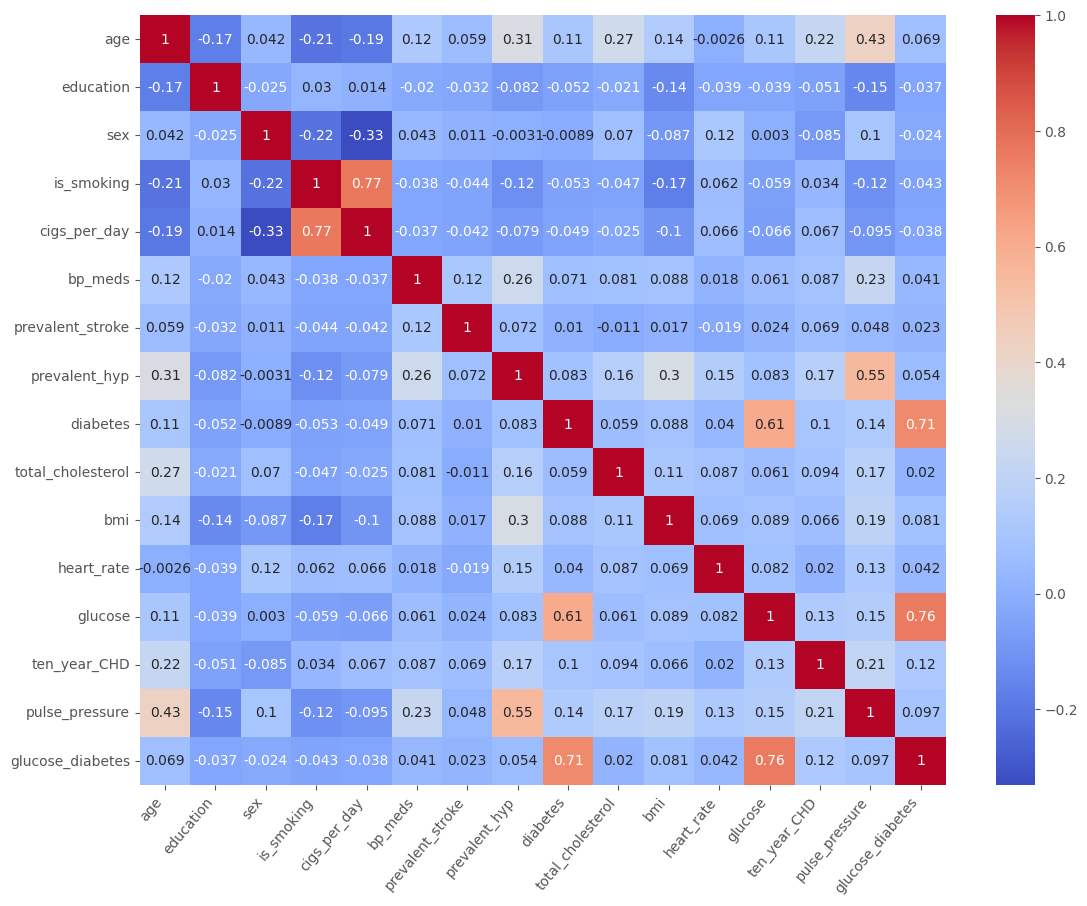

In [309]:
# Select your features wisely to avoid overfitting
# Correlation Heatmap visualization code
plt.figure(figsize= (13,10))
corr = sns.heatmap(df.corr(), annot = True, cmap='coolwarm')
corr.set_xticklabels(corr.get_xticklabels(),horizontalalignment='right',  rotation=50 )

To ensure that only the most impactful features are included in our final dataframe, we are using the Variance Inflation Factor (VIF) technique to identify multicollinearity among the  variables. Only the variables with low VIF values will be included in the final dataframe.

In [310]:
# Defining a function for variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame(columns=['variables', 'VIF'])
    for i in range(X.shape[1]):
        vif.loc[i] = [X.columns[i], variance_inflation_factor(X.values, i)]
    return vif


In [311]:
# computing the vif while excluding features that provide no information
calc_vif(df[[i for i in df.describe().columns if i not in ['ten_year_CHD']]])

variables        VIF
0                 age  39.866809
1           education   4.484949
2                 sex   2.758048
3          is_smoking   4.967487
4        cigs_per_day   4.240309
5             bp_meds   1.131935
6    prevalent_stroke   1.027045
7       prevalent_hyp   2.145298
8            diabetes   2.153380
9   total_cholesterol  30.607057
10                bmi  35.430361
11         heart_rate  36.414149
12            glucose  29.547950
13     pulse_pressure  20.162684
14   glucose_diabetes   3.035208

In order to avoid multicollinearity, we have decided to exclude certain features from our final dataframe. Specifically, we have chosen to remove glucose and diabetes as they have already been used to create new features, as well as is_smoking due to its high correlation with cigsPerDay.

In [312]:
# computing the vif while excluding features that provide no information
calc_vif(df[[i for i in df.describe().columns if i not in ['ten_year_CHD','glucose','diabetes','is_smoking']]])

variables        VIF
0                 age  38.520769
1           education   4.407676
2                 sex   2.747749
3        cigs_per_day   1.854801
4             bp_meds   1.130000
5    prevalent_stroke   1.026376
6       prevalent_hyp   2.097486
7   total_cholesterol  30.209232
8                 bmi  33.703637
9          heart_rate  33.868163
10     pulse_pressure  19.917280
11   glucose_diabetes   1.028247

Let's exclude BMI as it is having high VIF and not impacting much on target variable.

In [313]:
# computing the vif while excluding features that provide no information
calc_vif(df[[i for i in df.describe().columns if i not in ['ten_year_CHD','glucose','diabetes','is_smoking','bmi']]])

variables        VIF
0                 age  35.491460
1           education   4.387950
2                 sex   2.717808
3        cigs_per_day   1.852773
4             bp_meds   1.129835
5    prevalent_stroke   1.026356
6       prevalent_hyp   2.091383
7   total_cholesterol  28.537000
8          heart_rate  28.419022
9      pulse_pressure  19.760589
10   glucose_diabetes   1.027703

NOw Total cholesterol should be excluded because it has little impact on the target variable.

In [314]:
# computing the vif while excluding features that provide no information
calc_vif(df[[i for i in df.describe().columns if i not in ['ten_year_CHD','glucose','diabetes','is_smoking','total_cholesterol','bmi']]])

variables        VIF
0               age  27.708603
1         education   4.293437
2               sex   2.702299
3      cigs_per_day   1.836097
4           bp_meds   1.129407
5  prevalent_stroke   1.025662
6     prevalent_hyp   2.089369
7        heart_rate  25.202099
8    pulse_pressure  19.677486
9  glucose_diabetes   1.027428

Finally, since heart rate has a high VIF and has little effect on the objective variable, we will exclude it.

In [315]:
# computing the vif while excluding features that provide no information
calc_vif(df[[i for i in df.describe().columns if i not in ['ten_year_CHD','glucose','diabetes','is_smoking','total_cholesterol','bmi', 'heart_rate', "education"]]])

variables        VIF
0               age  16.250035
1               sex   2.531196
2      cigs_per_day   1.647940
3           bp_meds   1.124039
4  prevalent_stroke   1.024570
5     prevalent_hyp   2.063707
6    pulse_pressure  18.809109
7  glucose_diabetes   1.025981

In [316]:
# Creating the final dataframe with the features that were chosen above.
Final_dataframe = df[['age','sex','cigs_per_day','bp_meds','prevalent_stroke','prevalent_hyp','glucose_diabetes','pulse_pressure','ten_year_CHD']]

##### What all feature selection methods have you used  and why?

We have used Seaborn's  heatmap to visualize the relationship between each feature and the target variable. From the plots, we observed that some features such as BPmeds, diabetes, totchol, etc. show a positive correlation with the target variable.


In order to improve the performance of our model, we utilized various techniques such as the Filter method with correlation heatmap and VIF (variance inflation factor) to remove features that were not contributing significantly to the model's accuracy. We also addressed the issue of multicollinearity by selecting only those features that were highly dependent on our target variable.







##### Which all features you found important and why?

Based on our analysis using correlation heatmap and VIF, we have identified a set of final features that are strongly correlated with the target variable (Sales) and have low multicollinearity. These selected features provide unique information

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [324]:
# Transform Your data
# checking which of the variables are continous in nature
for i in Final_dataframe.columns:
  print(f"The number of unique counts in feature {i} is: {Final_dataframe[i].nunique()}")


The number of unique counts in feature age is: 39
The number of unique counts in feature sex is: 2
The number of unique counts in feature cigs_per_day is: 33
The number of unique counts in feature bp_meds is: 2
The number of unique counts in feature prevalent_stroke is: 2
The number of unique counts in feature prevalent_hyp is: 2
The number of unique counts in feature glucose_diabetes is: 2
The number of unique counts in feature pulse_pressure is: 173
The number of unique counts in feature ten_year_CHD is: 2


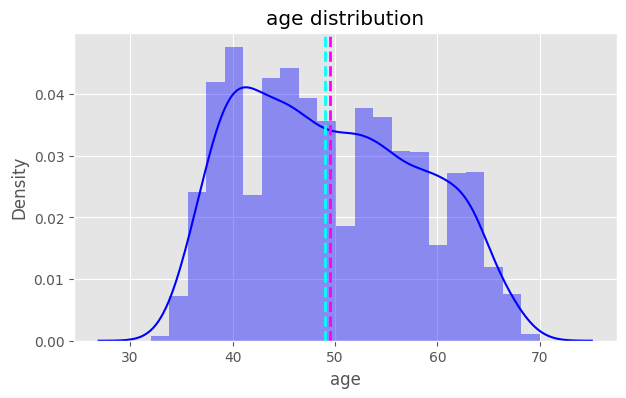

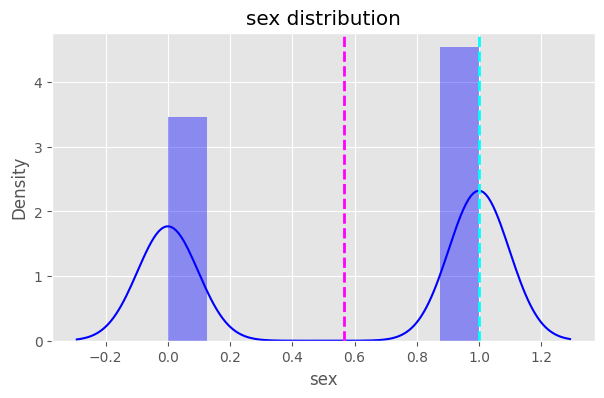

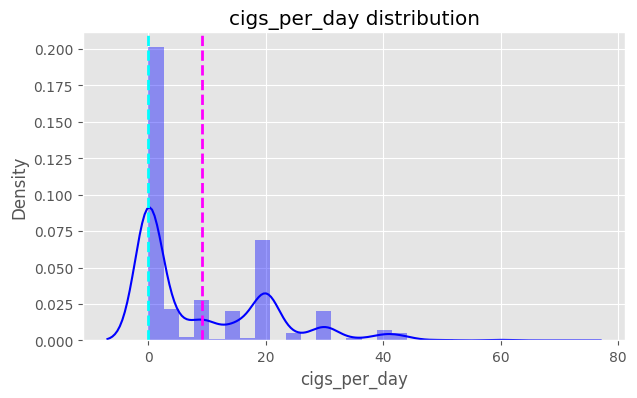

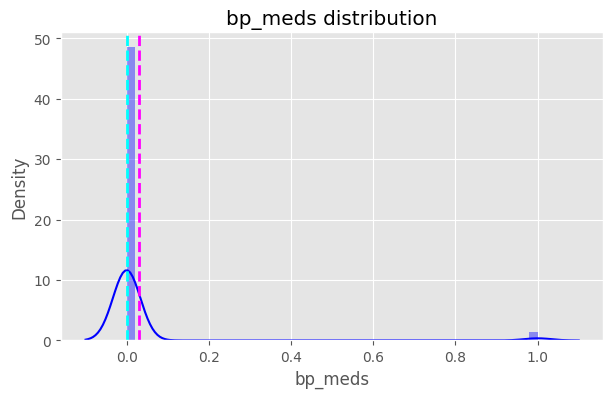

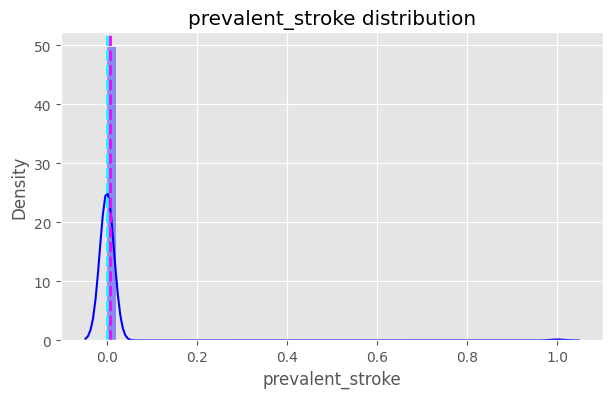

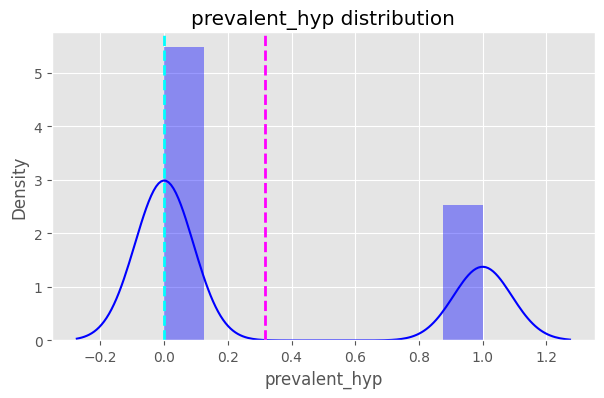

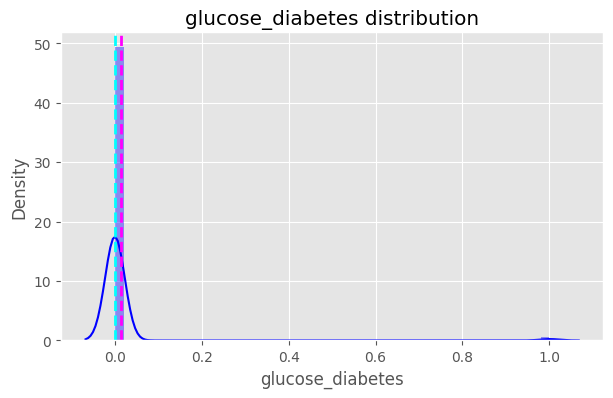

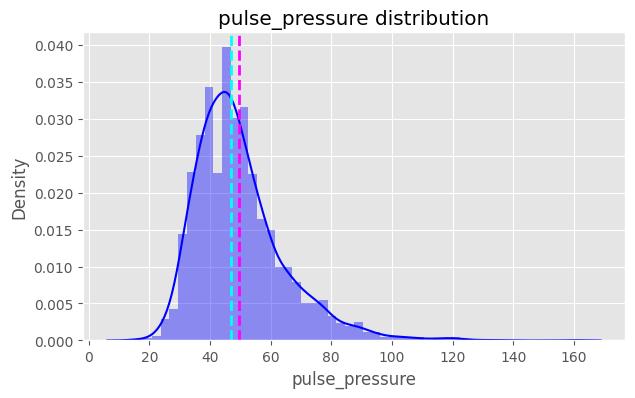

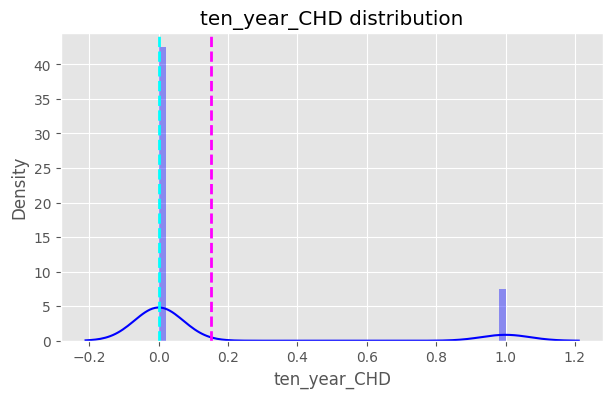

In [318]:
for col in Final_dataframe:
  plt.figure(figsize=(7,4))
  sns.distplot(df[col], color = 'blue')
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

They are not exactly regularly distributed, as can be seen from the distribution graphs above. To obtain the typically distributed data, we shall thus employ several transformation techniques.

In [319]:
# Implementing log transformation on continuous variables
Final_dataframe['age']    = np.log10(Final_dataframe['age']+1)
Final_dataframe['sex']    = np.log10(Final_dataframe['sex']+1)
Final_dataframe['bp_meds']    = np.log10(Final_dataframe['bp_meds']+1)
Final_dataframe['prevalent_stroke']    = np.log10(Final_dataframe['prevalent_stroke']+1)
Final_dataframe['cigs_per_day']  = np.log10(Final_dataframe['cigs_per_day']+1)
Final_dataframe['prevalent_hyp']  = np.log10(Final_dataframe['prevalent_hyp']+1)
Final_dataframe['glucose_diabetes']    = np.log10(Final_dataframe['glucose_diabetes']+1)
Final_dataframe['pulse_pressure'] = np.log10(Final_dataframe['pulse_pressure']+1)

#Final_dataframe = df[['age','sex','cigs_per_day','bp_meds','prevalent_stroke','prevalent_hyp','glucose_diabetes','pulse_pressure','ten_year_CHD']]

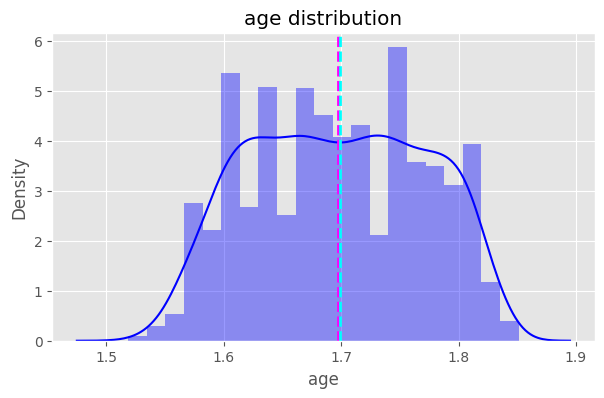

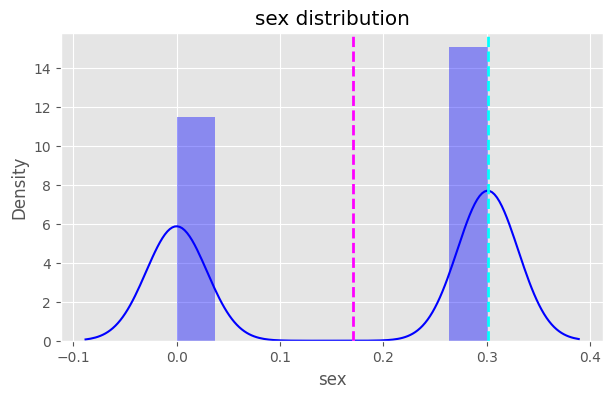

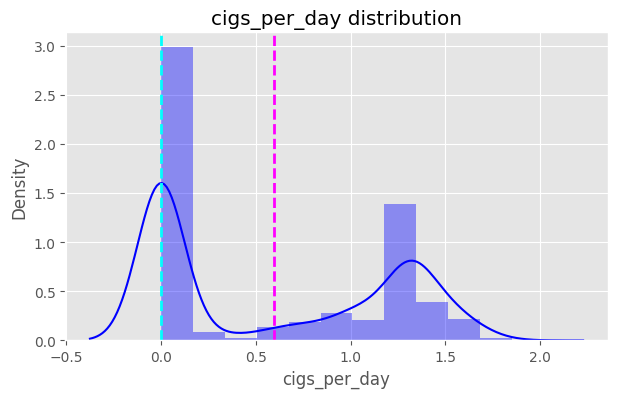

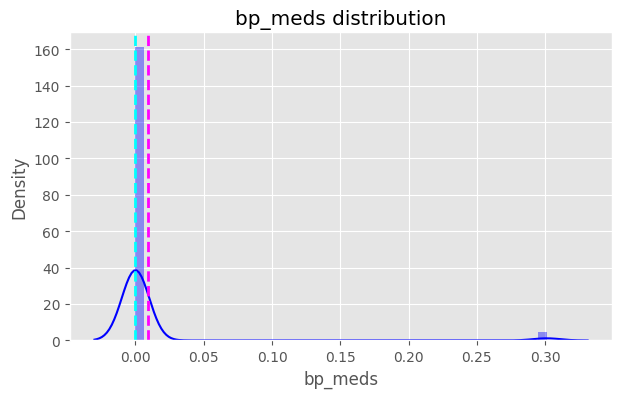

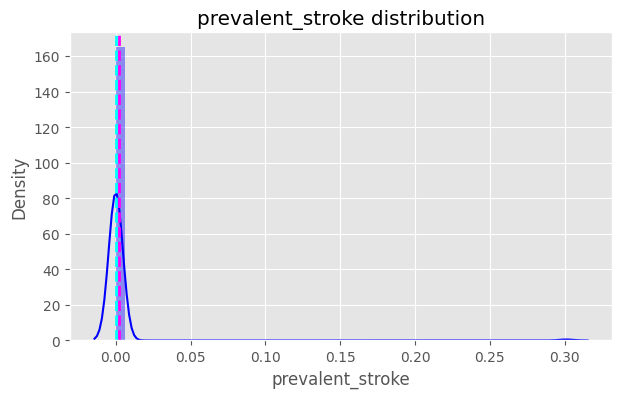

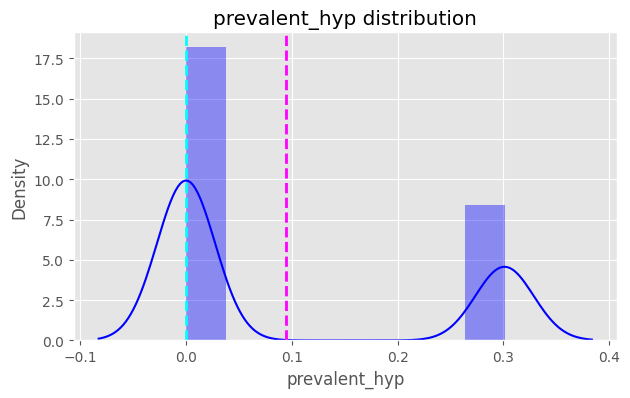

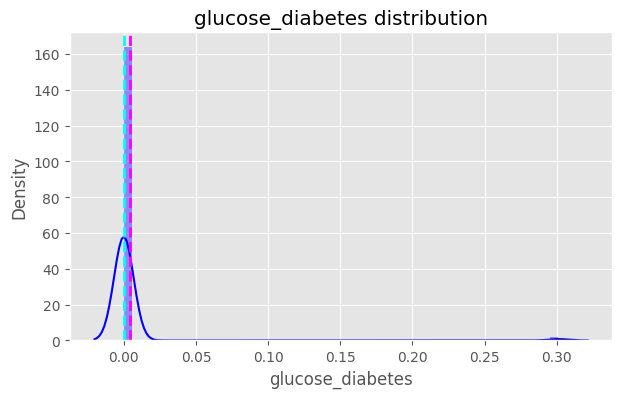

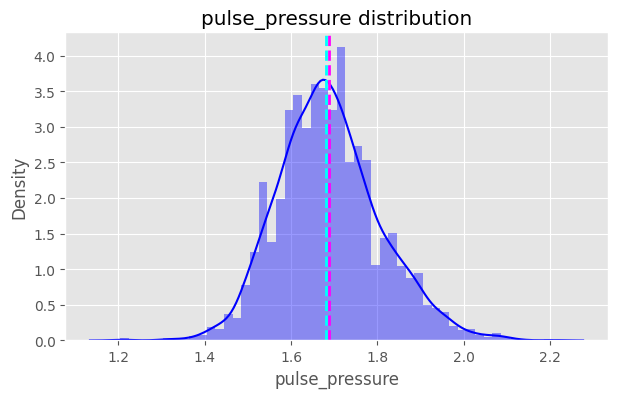

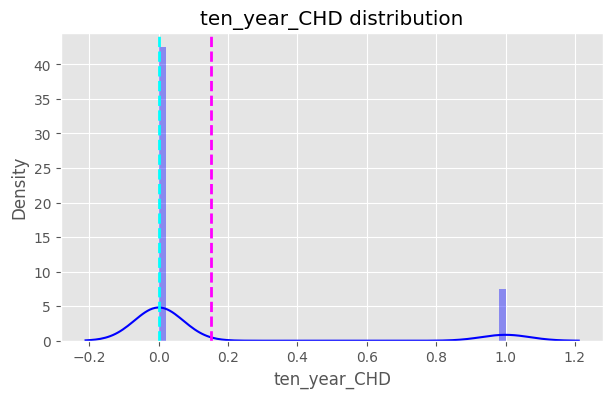

In [322]:
for col in Final_dataframe:
  plt.figure(figsize=(7,4))
  sns.distplot(Final_dataframe[col], color="blue")
  plt.axvline(Final_dataframe[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(Final_dataframe[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

### 6. Data Scaling

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

**This section will be skipped because we have fewer features.**

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer here

In [321]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [327]:
# Split your data to train and test. Choose Splitting ratio wisely.
x= Final_dataframe.drop(columns='ten_year_CHD',axis=1)
y= Final_dataframe[['ten_year_CHD']]

## Importing train_test_split from sklearn
from sklearn.model_selection import train_test_split


In [328]:


## Spliting data
X_train , X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [329]:
# getting shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2712, 8), (678, 8), (2712, 1), (678, 1))

In [215]:
print("Distribution of classes of dependent variable in train :")
print(y_train.value_counts())

print("Distribution of classes of dependent variable in test :")
print(y_test.value_counts())
     

Distribution of classes of dependent variable in train :
ten_year_CHD
0               2303
1                409
dtype: int64
Distribution of classes of dependent variable in test :
ten_year_CHD
0               576
1               102
dtype: int64


##### What data splitting ratio have you used and why? 



* Train Set - 80
*  Test Set - 20



### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

The dataset is imbalanced, which is expected since the number of individuals with a risk of cardiovascular disease is likely to be lower than those without. The target variable indicating the presence or absence of risk is binary, with a value of 1 indicating risk and 0 indicating no risk. This class imbalance can lead to biased results during model training and evaluation.


The dataset will be balanced using the Synthetic Minority Oversampling Technique (SMOTE) to address this issue.

In [216]:
# Handling Imbalanced Dataset (If needed)
print(Final_dataframe['ten_year_CHD'].value_counts())

0    2879
1     511
Name: ten_year_CHD, dtype: int64


([<matplotlib.axis.XTick at 0x7f3574b05040>,
 [Text(0, 0, 'No Risk(0)'), Text(1, 0, 'At Risk(1)')])

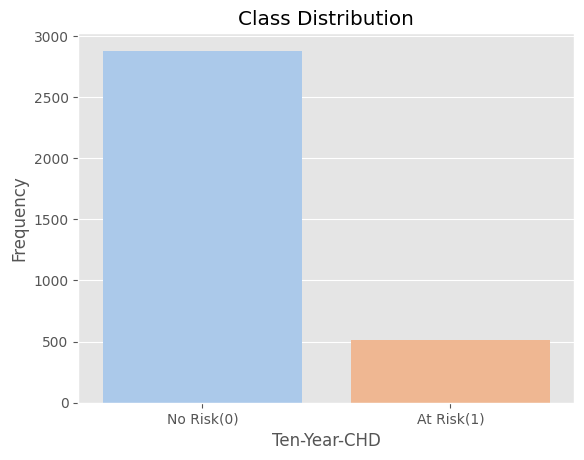

In [217]:
# Plotting the class distribution
import seaborn as sns

sns.countplot(x='ten_year_CHD', data=Final_dataframe ,palette = "pastel" )
plt.title("Class Distribution")
plt.xlabel("Ten-Year-CHD")
plt.ylabel("Frequency")
plt.xticks([0, 1], ['No Risk(0)', 'At Risk(1)'])


In [218]:
# Importing SMOTE for balancing the dataset
from imblearn.over_sampling import SMOTE

# Creating the instance
smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [219]:
print('Samples in the original dataset', len(y_train))
print('Samples in the resampled dataset', len(y_smote))

Samples in the original dataset 2712
Samples in the resampled dataset 4606


In [220]:
for col,label in [[y_train,"Before"],[y_smote,'After']]:
  print(label+' Handling Class Imbalace:')
  print(col.value_counts(),'\n')
     

Before Handling Class Imbalace:
ten_year_CHD
0               2303
1                409
dtype: int64 

After Handling Class Imbalace:
ten_year_CHD
0               2303
1               2303
dtype: int64 



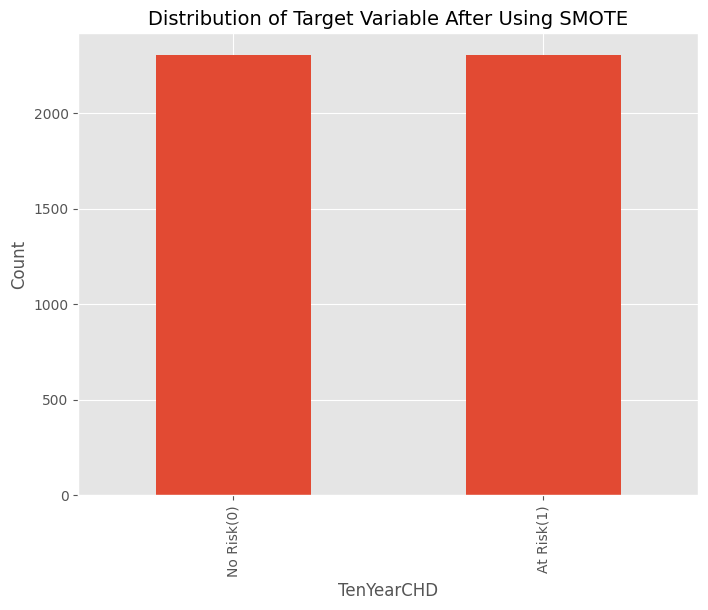

In [221]:
plt.figure(figsize=(8,6))
y_smote.value_counts().plot(kind='bar')
plt.title('Distribution of Target Variable After Using SMOTE', fontsize=14)
plt.xlabel('TenYearCHD', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['No Risk(0)', 'At Risk(1)'])
plt.show()

Using SMOTE, we were able to successfully oversample the minority class. Now, the model we create will be able to gain knowledge from both classes impartially.

In [222]:
# Respliting the dataset after using SMOTE
x_smote_train, x_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote,y_smote , test_size = 0.2, random_state = 0) 

In [223]:
x_smote_train.shape , x_smote_test.shape

((3684, 8), (922, 8))

In [224]:
y_smote_train.shape , y_smote_test.shape

((3684, 1), (922, 1))

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

As the dataset is imbalanced, with a higher number of instances belonging to the "0" class (people with no risk of CHD), any model trained on this data would be biased towards the "0" class. To address this issue, we need to use techniques that allow the model to handle the imbalanced data and make predictions that are not biased towards the majority class.

We aim to develop a model that can predict the risk of CHD based on the patient's health data, even if the risk is low.

We are applying SMOTE on the training set to tackle the imbalances in the dataset. SMOTE, which stands for Synthetic Minority Oversampling Technique, is a data augmentation technique for the minority class. This technique generates synthetic examples that are similar to the existing examples from the minority class in terms of feature space. These synthetic examples are generated to provide more balanced representation of the minority class in the dataset.

###10. Data Scaling

In [225]:
## Scaling your data
# Importing StandardScaler librarySS
from sklearn.preprocessing import StandardScaler

# Creating instance
std_scaler= StandardScaler()



In [226]:
# Fit and Transform
X_smote_train= std_scaler.fit_transform(x_smote_train)
X_smote_test= std_scaler.transform(x_smote_test)
  

####Which method have you used to scale you data and why?

We utilized the StandardScaler function from the sklearn library to scale our data. This is critical since having features on varying scales can result in poor performance or slow convergence. Scaling the features also simplifies the comparison of different features or the observation of the impact of a feature on the target variable by comparing the magnitude of its coefficient.

In [227]:
# Scaled train values
x_smote_train.head()

age      sex  cigs_per_day  bp_meds  prevalent_stroke  \
3174  1.792392  0.00000      1.204120      0.0               0.0   
569   1.732394  0.00000      0.000000      0.0               0.0   
2876  1.661331  0.00000      1.437099      0.0               0.0   
415   1.792392  0.00000      0.778151      0.0               0.0   
3484  1.781130  0.30103      1.260471      0.0               0.0   

      prevalent_hyp  glucose_diabetes  pulse_pressure  
3174        0.00000          0.000000        1.628749  
569         0.30103          0.000000        1.633468  
2876        0.00000          0.213838        1.538669  
415         0.00000          0.000000        1.720159  
3484        0.30103          0.000000        1.815167

## ***7. ML Model Implementation***

In [333]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


def analyse_model(model, x_train, x_test, y_train, y_test):

 
    # Fitting the model
    model.fit(x_train,y_train)

    # Print best parameters if applicable
    try:
        print(f"The best parameters are: {model.best_params_}")
    except:
        pass

    # Plotting Evaluation Metrics for train and test dataset
    for x, y, label in [(x_train, y_train, 'Train-Set'),(x_test, y_test, "Test-Set")]:
        
        # Getting required metrics
        pred = model.predict(x)
        pred_proba = model.predict_proba(x)[:,1]
        report = classification_report(y_true=y, y_pred=pred, output_dict=True)
        matrix = confusion_matrix(y_true=y, y_pred=pred)
        fpr, tpr, thresholds = roc_curve(y, pred_proba)
        auc_score = auc(fpr, tpr)

        # Classification report
        plt.figure(figsize=(8,3))
        sns.heatmap(pd.DataFrame(report).iloc[:-1, :-2].T, annot=True, cmap="Blues", fmt=".2f", annot_kws={"fontsize":14, "fontweight":"bold"}, linewidths=1.0)
        plt.title(f'{label} Classification Report')
        plt.show()

        # Confusion Matrix
        plt.figure(figsize=(4,4))
        sns.heatmap(matrix, annot=True, cmap="Blues", fmt=".2f", annot_kws={"fontsize":14, "fontweight":"bold"}, linewidths=1.0)
        plt.title(f'{label} Confusion Matrix')
        plt.xlabel('Predicted labels')  
        plt.ylabel('Actual labels')
        plt.show()

        # AUC_ROC Curve
        plt.figure(figsize=(4,4))
        plt.plot([0,1],[0,1],'k--')
        plt.plot(fpr,tpr,label=f'AUC = {auc_score:.3f}')
        plt.legend(loc=4)
        plt.title(f'{label} AUC_ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.show()

      
    return model


### ML Model - 1 **Logistic Regression**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

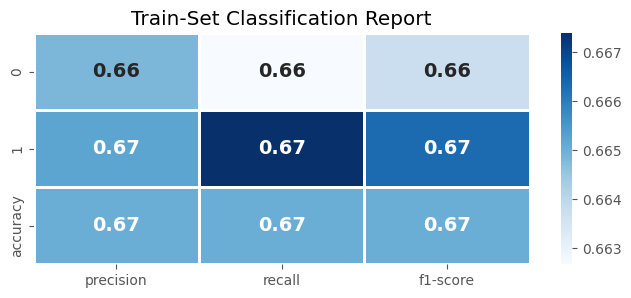

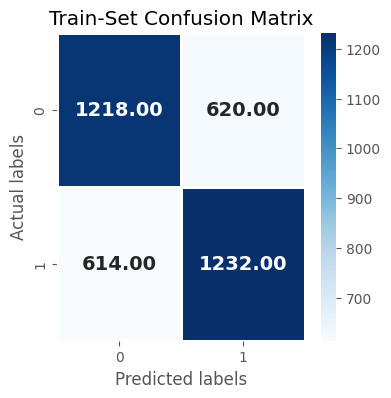

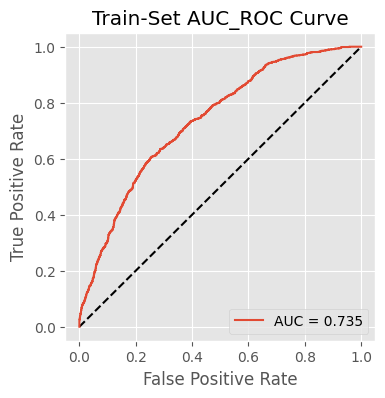

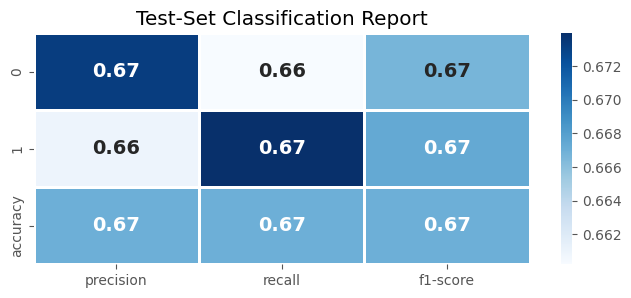

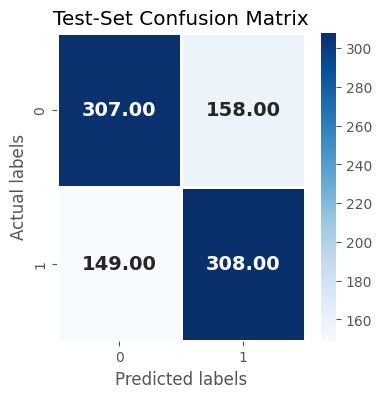

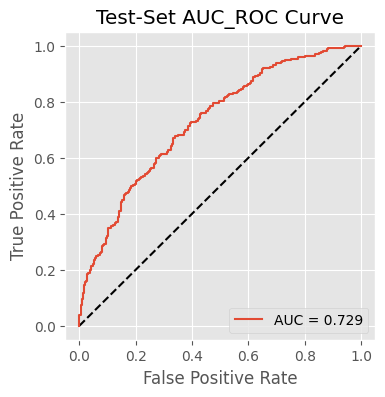

LogisticRegression(max_iter=20000, random_state=0)

In [334]:
# ML Model - 1 Implementation
# Importing LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression


# Visualising the evaluation metric score chart and fitting the logistic regression model
logistic_classifier = LogisticRegression(fit_intercept=True, penalty='l2',max_iter=20000,random_state=0)
analyse_model(logistic_classifier, x_smote_train, x_smote_test, y_smote_train, y_smote_test)

We chose to use a Logistic Regression model as a starting point for binary classification. Since our primary concern is identifying patients who may be at risk of infection in the future, we prioritized maximizing the recall metric in our analysis. We aimed to minimize false negatives, which numbered at 151 in our dataset. After training the model, we obtained recall scores of 0.68 on the train set and 0.67 on the test set, along with an AUC-ROC score of 72% and an accuracy of 73%.


In the test dataset, comprising of 1152 patients, our model accurately predicted 832 patients while incorrectly predicting 320 patients. We are primarily concerned with minimizing the number of false positives, particularly for patients who have a higher likelihood of being infected in the future.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2 Random Forest

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

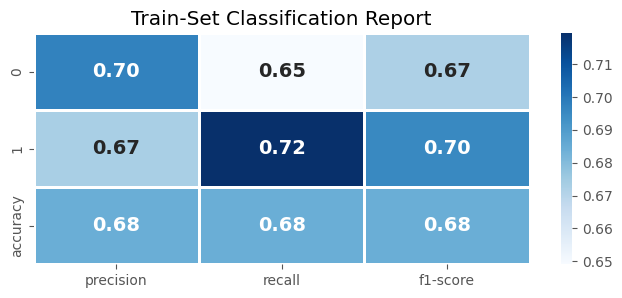

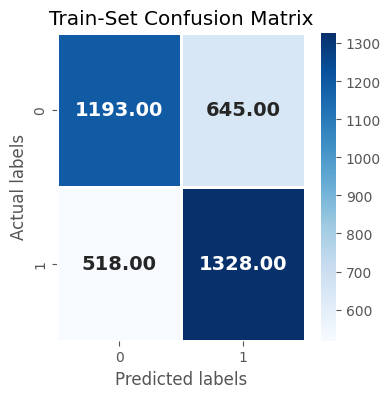

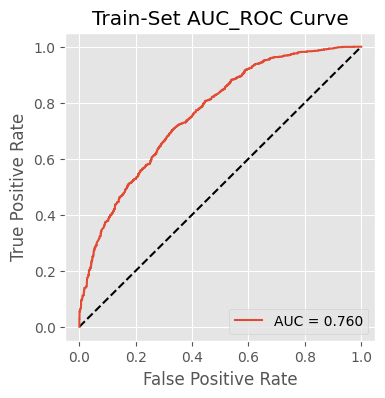

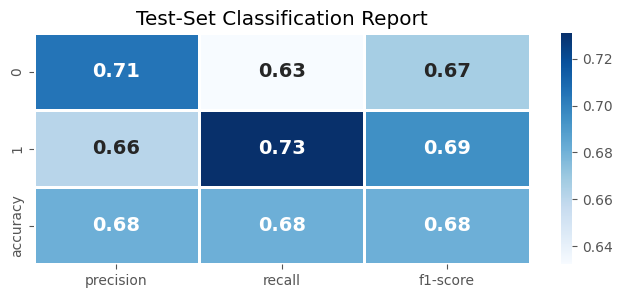

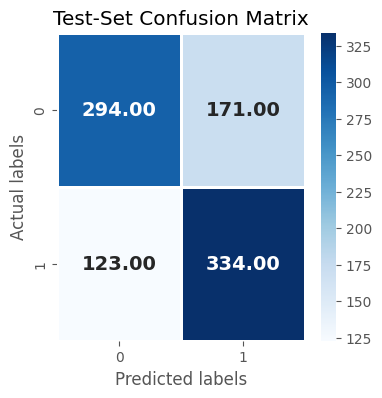

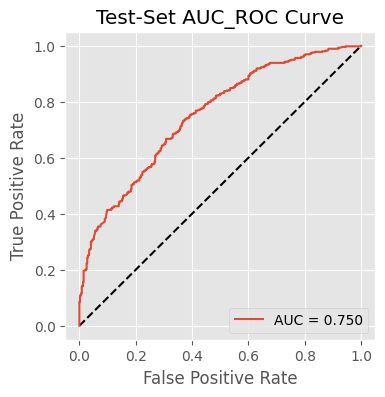

RandomForestClassifier(max_depth=3, n_estimators=500, n_jobs=-1, random_state=0)

In [335]:
# Visualizing evaluation Metric Score chart

# Importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Fitting the Model
RF_classifier = RandomForestClassifier(n_estimators=500,max_depth=3,n_jobs=-1,random_state=0)

## Visualizing evaluation Metric Score chart
analyse_model(RF_classifier, x_smote_train, x_smote_test, y_smote_train, y_smote_test)


We had the option to use a Decision Tree as our base model, but in order to achieve better results, we opted to use an ensemble technique called Random Forest. This approach can reduce errors by leveraging multiple decision trees with different subsets of the features. By combining the outputs of these trees, Random Forest can provide more accurate and reliable predictions.

After implementing Random Forest, we observed a significant improvement in recall for class 1, from 0.67 in Logistic Regression to 0.73 in Random Forest, and an increase in AUC-ROC score from 72% to 75%. These results indicate that our model is effectively differentiating between the two categories of the target variable. Additionally, we noted f1-scores of 0.67 for class 0 and 0.69 for class 1 in the test set, suggesting that we have achieved a balance between precision and recall.

#### 2. Cross- Validation & Hyperparameter Tuning

The best parameters are: {'max_depth': 10, 'n_estimators': 350}


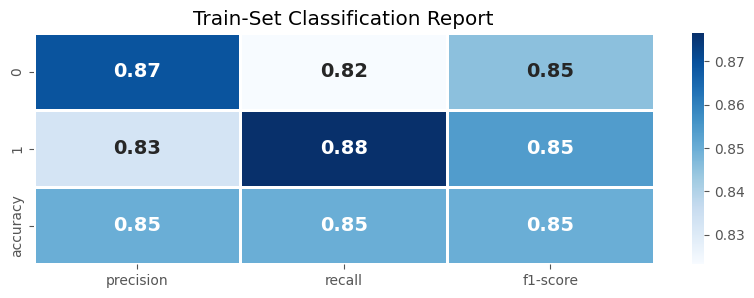

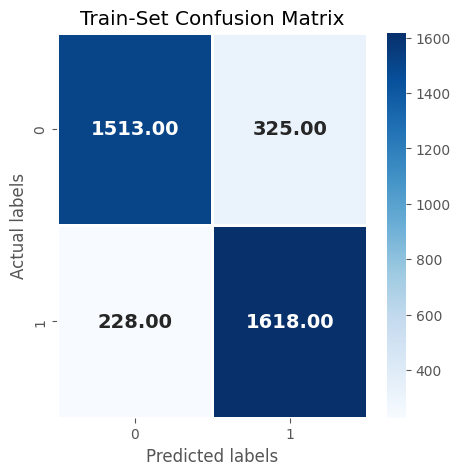

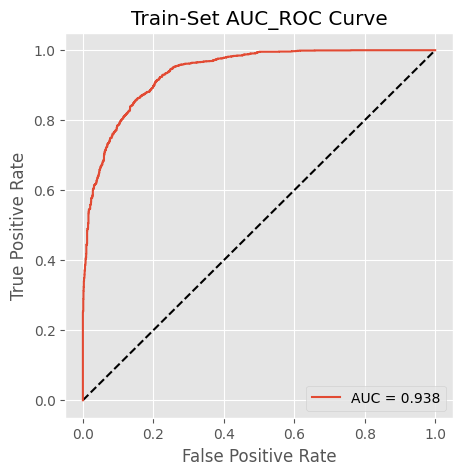

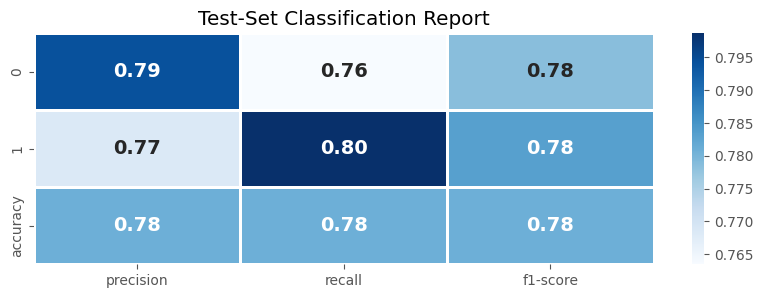

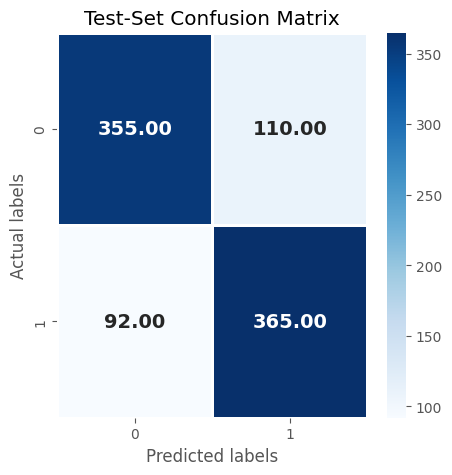

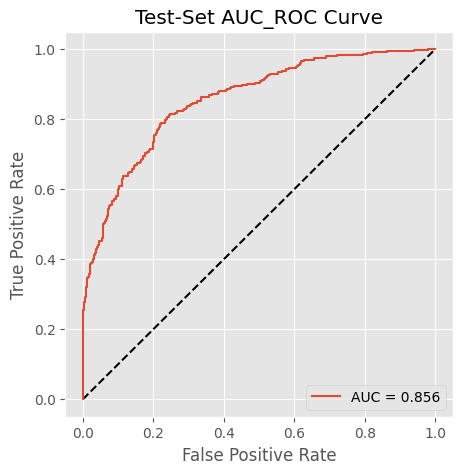

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [7, 8, 10],
                         'n_estimators': [150, 250, 300, 350]},
             scoring='roc_auc')

In [232]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# # Import necessary library
from sklearn.model_selection import GridSearchCV

# Instantiate the Random Forest model
RF_tree = RandomForestClassifier(random_state=0)

# Define the parameters to be tuned
grid_values = {'n_estimators':[150,250,300,350], 'max_depth':[7,8,10]}

# # Fit the Algorithm RandomForestClassifier Model with GridSearchCV
RF_gridsearch = GridSearchCV(RF_tree, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Analysing the model
analyse_model(RF_gridsearch, x_smote_train, x_smote_test, y_smote_train, y_smote_test)
     


# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

We utilized GridSearchCV as our hyperparameter optimization technique because it exhaustively searches all possible combinations of hyperparameters and returns the most optimal results. By evaluating the performance of each combination, GridSearchCV is able to select the best value for each hyperparameter, leading to more accurate model tuning. This approach provides a thorough and reliable method for optimizing hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Hyperparameter tuning of Random forest has resulted in a significant improvement in the model's performance, with the number of wrongly predicted patients reduced to 92 and 110 in each class, indicating better prediction results. The recall for class 1 has also increased from 0.73 to 0.80 on the test set, which is a positive sign.

Furthermore, the accuracy and auc-roc of the model have improved to 77% and 85% respectively after the hyperparameter tuning of Random forest, with the best parameters identified as {'max_depth': 10, 'n_estimators': 150}.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

In addition to evaluating the performance of our ML model, it is also important to consider the business implications of our results. With a high-performing model that accurately predicts the likelihood of a patient being infected, healthcare providers can take proactive measures to prevent the spread of disease and provide early treatment to those at risk. This can ultimately result in improved patient outcomes and reduced healthcare costs.

### ML Model - 3.   **K-Nearest Neighbors**

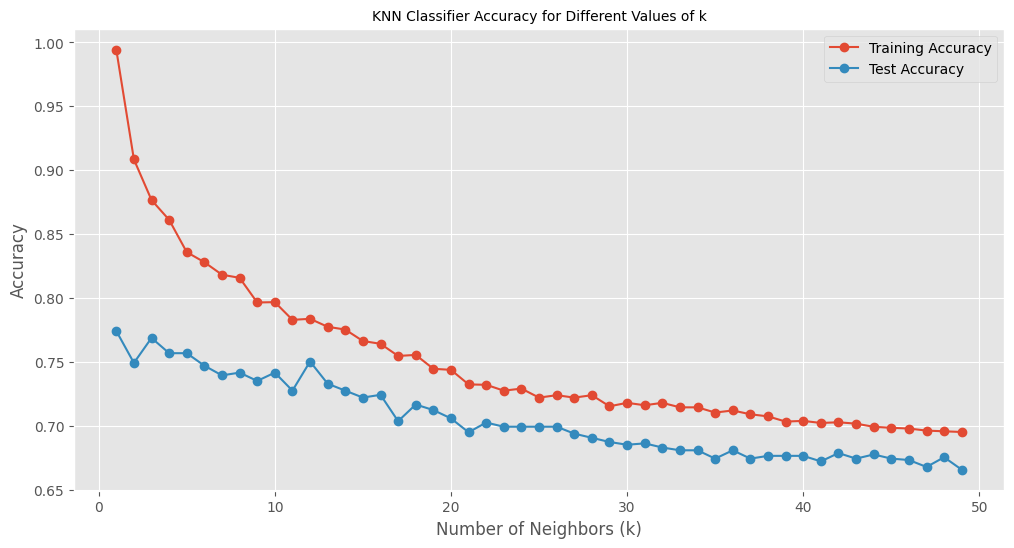

In [233]:
# ML Model - 3 Implementation

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

# Define the range of k values to test
k_values = range(1, 50)

# Create empty arrays to store training and test accuracies for each k value
train_accuracies = np.zeros(len(k_values))
test_accuracies = np.zeros(len(k_values))

# Loop through each k value and train a KNN classifier
for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_smote_train, y_smote_train)
    
    # Compute the training and test accuracy for this k value
    train_accuracies[i] = knn.score(x_smote_train, y_smote_train)
    test_accuracies[i] = knn.score(x_smote_test, y_smote_test)

# Plot the training and test accuracies for each k value
plt.figure(figsize=(12, 6))
plt.plot(k_values, train_accuracies, label='Training Accuracy' , marker='o')
plt.plot(k_values, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Classifier Accuracy for Different Values of k' , fontsize = 10)
plt.legend()
plt.show()



     



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

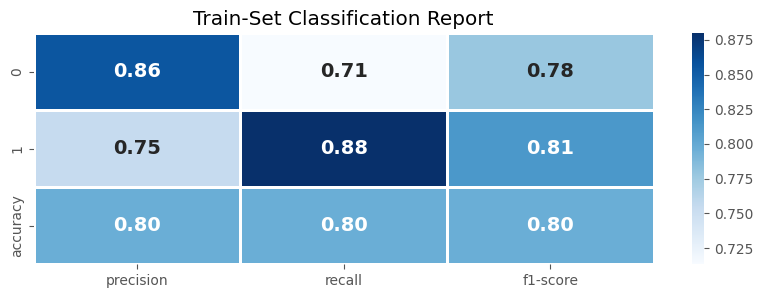

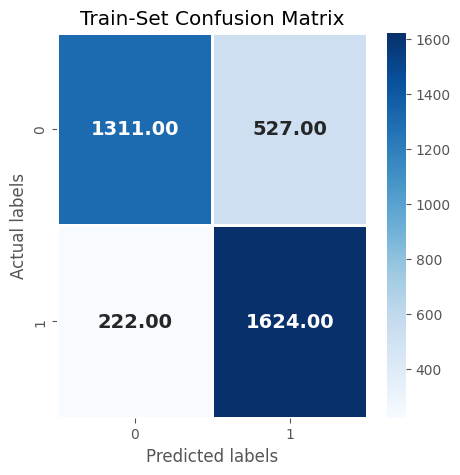

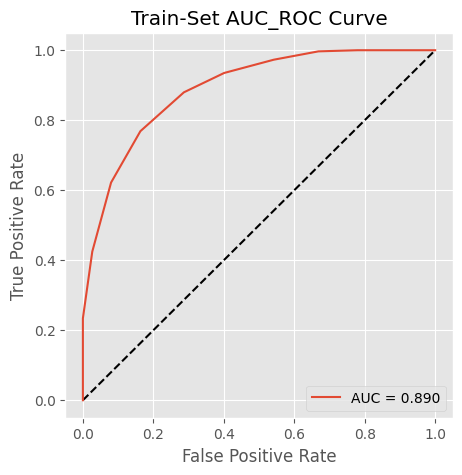

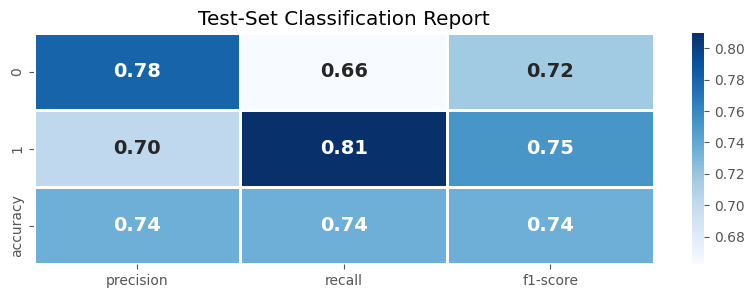

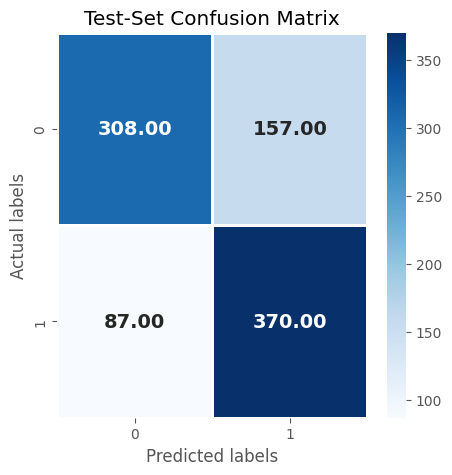

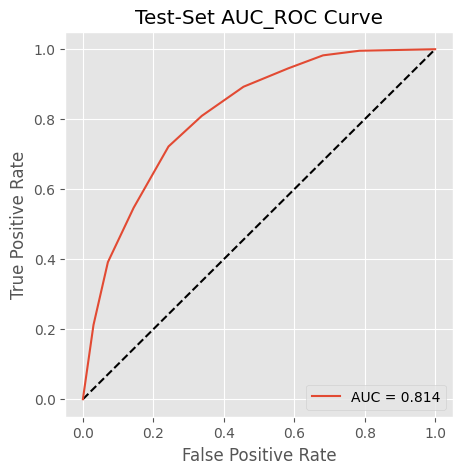

KNeighborsClassifier(n_neighbors=9)

In [234]:
# Visualizing evaluation Metric Score chart
# Importing KNN
from sklearn.neighbors import KNeighborsClassifier

# fit the Model
K_Nearst_classifier = KNeighborsClassifier(n_neighbors=9,p=2,metric='minkowski')

#  Visualizing evaluation Metric Score chart
analyse_model(K_Nearst_classifier, x_smote_train, x_smote_test, y_smote_train, y_smote_test)

The classification report reveals that our model exhibits a high recall value of 0.81 for the minority class (1), but its prediction for class 0 is not as satisfactory (recall=0.67), leading to a lower F-1 score. Despite this, the AUC-ROC score of 81% indicates that our KNN model can effectively distinguish between positive and negative classes.

#### 2. Cross- Validation & Hyperparameter Tuning

The best parameters are: {'n_neighbors': 5}


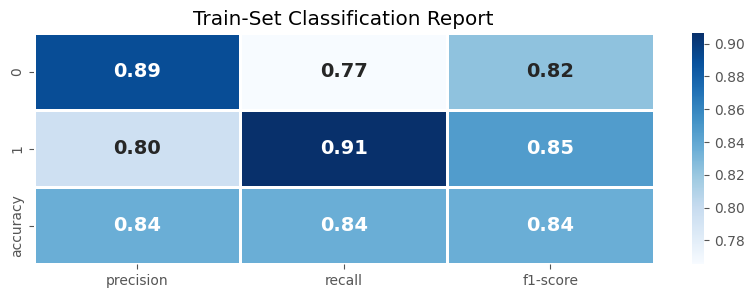

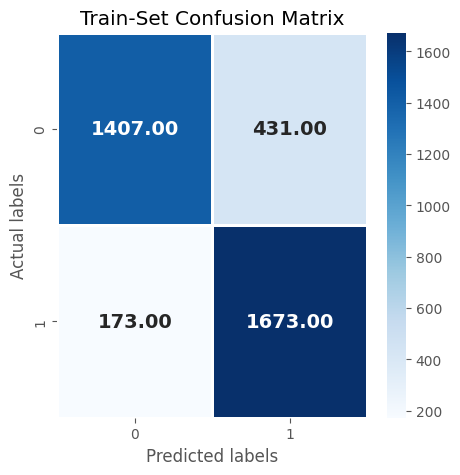

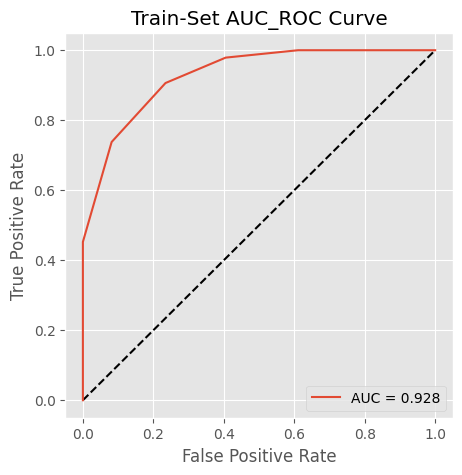

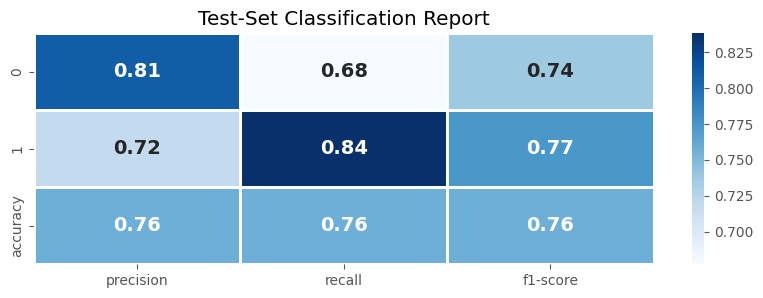

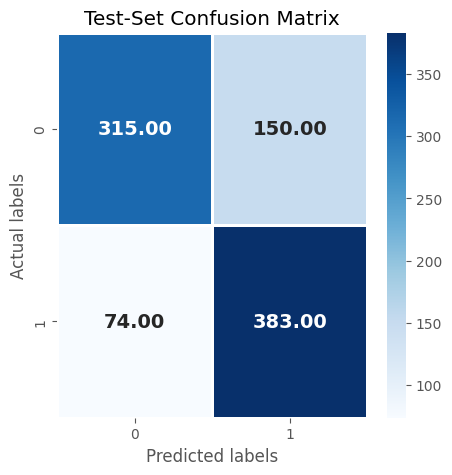

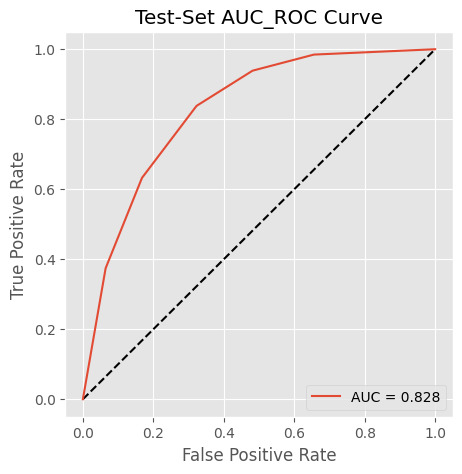

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 5, 8, 9, 15, 20]},
             scoring='roc_auc')

In [235]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Importing GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

# Defining the KNeighborsClassifier instance and the hyperparameters to be tuned
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [1, 2, 3, 5, 8, 9, 15, 20]}

# Creating the GridSearchCV instance
grid_search = GridSearchCV(knn, param_grid, scoring='roc_auc', cv=5)

# Fitting the GridSearchCV instance on the training data
grid_search.fit(x_smote_train, y_smote_train)

# Evaluating the model using the analyse_model function
analyse_model(grid_search, x_smote_train, x_smote_test, y_smote_train, y_smote_test)




##### Which hyperparameter optimization technique have you used and why?

Hyperparameter tuning is a crucial step in machine learning to obtain the best predictive accuracy. One of the most widely used approaches for hyperparameter tuning is GridSearchCV. In GridSearchCV, the machine learning model is trained and evaluated for a range of hyperparameter values. The algorithm searches for the best combination of hyperparameter values from a grid of possible values. This exhaustive search approach helps to identify the optimal hyperparameters for the model, leading to better performance.Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After performing hyperparameter tuning using GridSearchCV, we were able to identify the optimal value for the number of neighbors in KNN as 3. This resulted in an improvement in the recall values for both the minority class (0) and majority class (1), with recall values of 0.68 and 0.84 respectively. Furthermore, the AUC-ROC score was also improved from 81% to 82.3%. These results demonstrate the effectiveness of using GridSearchCV for optimizing hyperparameters and improving model performance.

###ML Model - 4- Naive Bayes

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

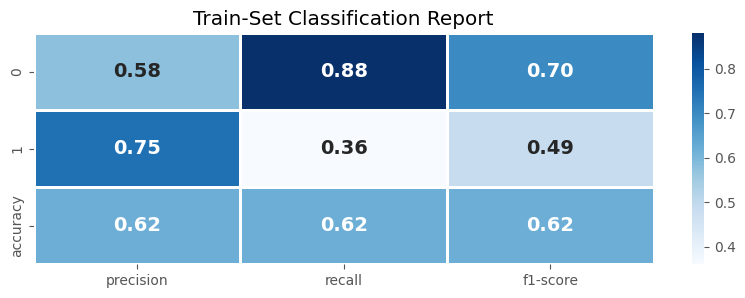

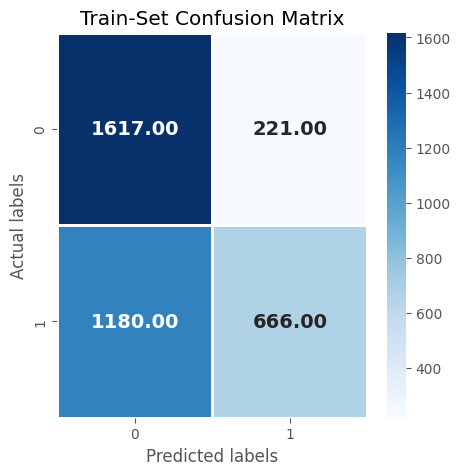

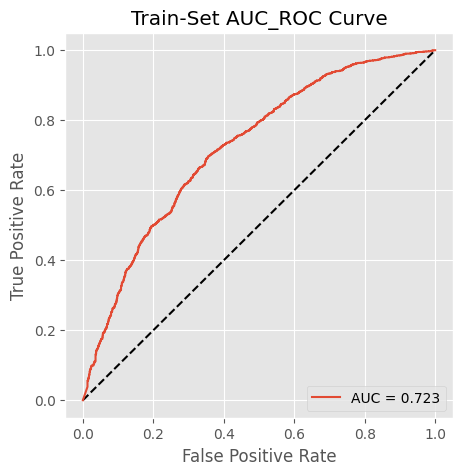

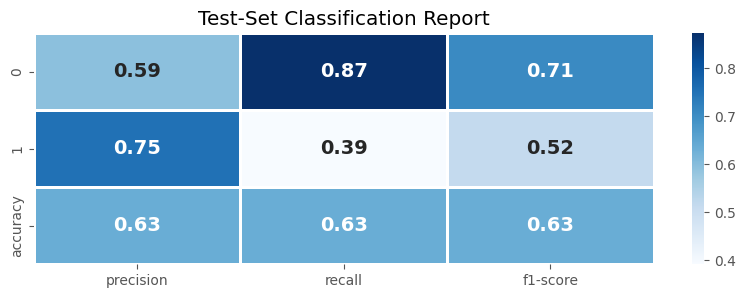

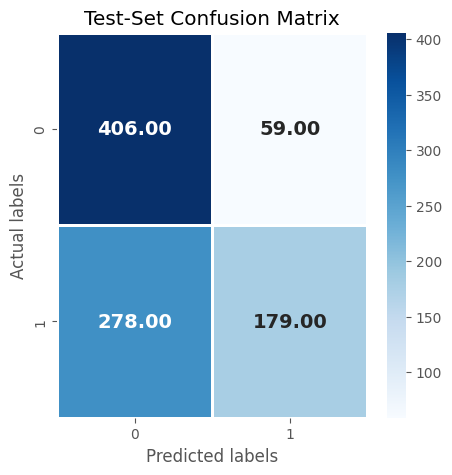

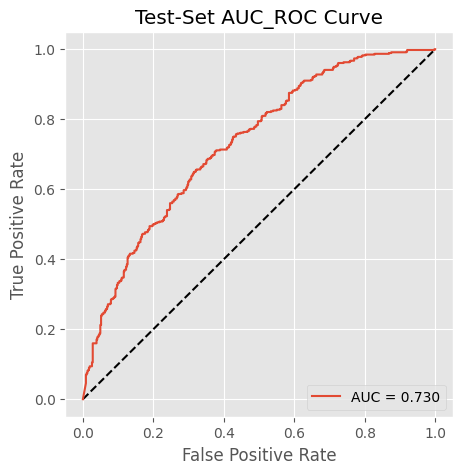

GaussianNB()

In [ ]:
# Importing GaussianNB
from sklearn.naive_bayes import GaussianNB

# Fitting the  Model
Naive_bayes = GaussianNB()

# Visualizing evaluation Metric Score chart
analyse_model(Naive_bayes, x_smote_train, x_smote_test, y_smote_train, y_smote_test)
     

Our analysis shows that the performance of the Naive Bayes model is not up to the mark as per our expectations. Even though the AUC-ROC score of 0.73 is satisfactory, it is alarming to note that the model incorrectly predicted 278 False Negative cases, i.e., risky patients who were not flagged as such. This has resulted in a very low recall value of 0.39 for the minority class, which is not acceptable in the context of healthcare data.

###ML Model - 5 **SVM**

###1. Explain the ML Model and it's performance using Evaluation metric Score Chart.

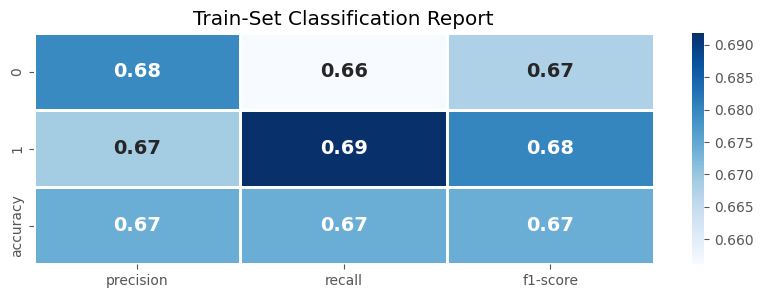

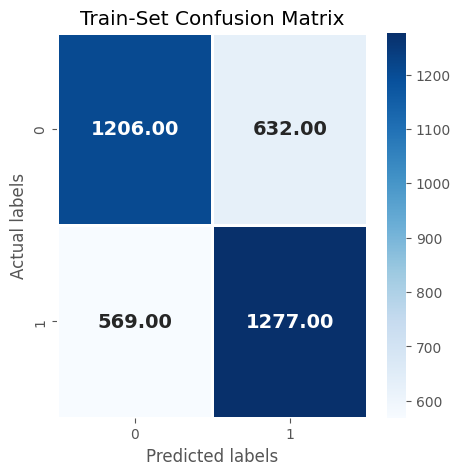

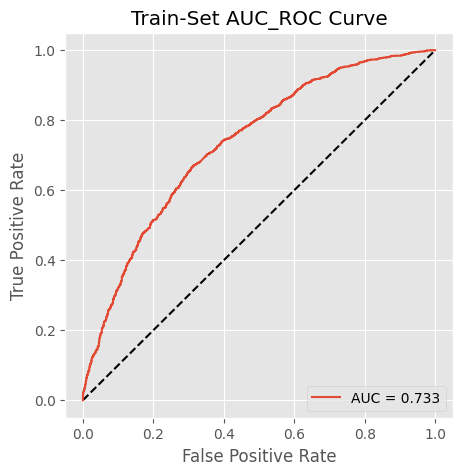

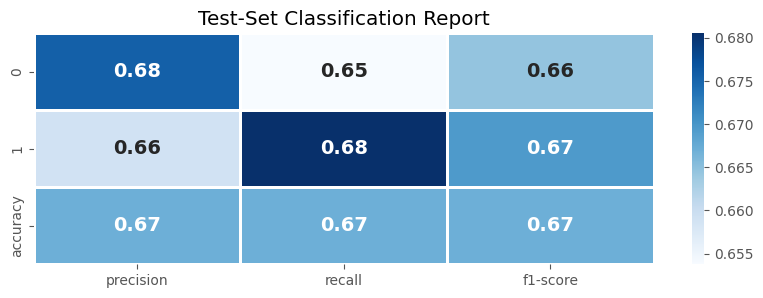

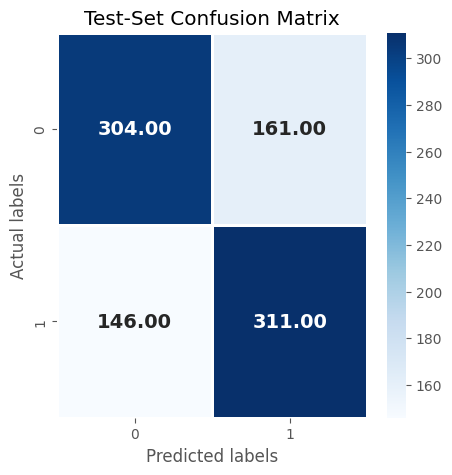

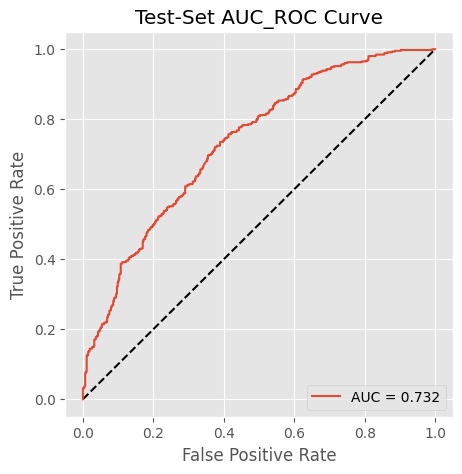

SVC(kernel='linear', probability=True, random_state=0)

In [ ]:
# Importing library 
from sklearn.svm import SVC

# Fitting Support vector Model
Support_vector_classifier = SVC(kernel='linear',probability=True,random_state=0)

#  Visualizing evaluation Metric Score chart
analyse_model(Support_vector_classifier, x_smote_train, x_smote_test, y_smote_train, y_smote_test)

The performance metrics of the test dataset reveal that our model is not performing well enough, with a precision and recall of 68% and 0.65% for class 0 and 66% and 68% for class 1, respectively. The accuracy is also not very impressive, with only 67%. Moreover, there are 146 false negatives which is concerning for healthcare data. However, we can attempt to improve the performance of our model by tuning the hyperparameters and assessing whether significant improvements can be achieved compared to XGBoost.

#### 2. Cross- Validation & Hyperparameter Tuning

The best parameters are: {'C': 10, 'kernel': 'poly', 'max_iter': 3000}


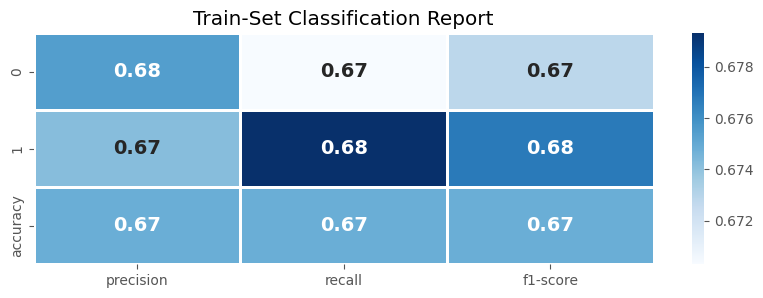

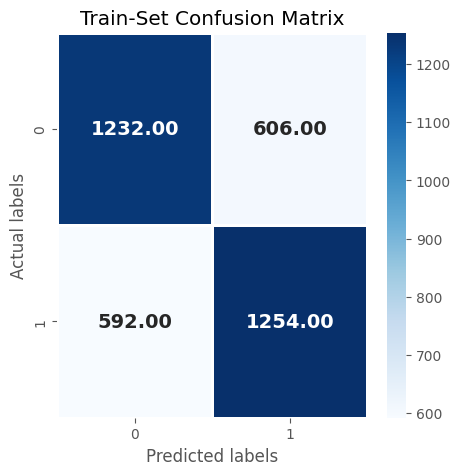

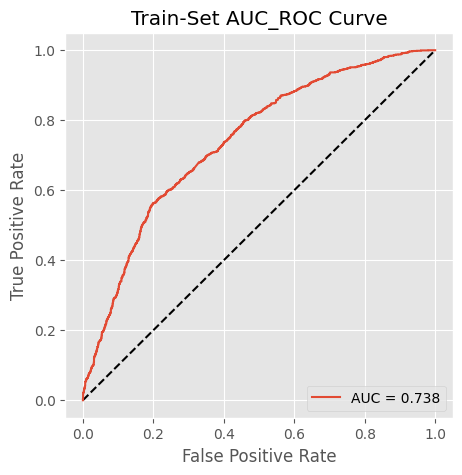

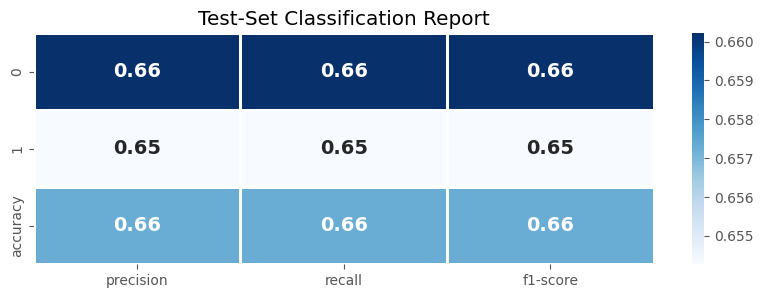

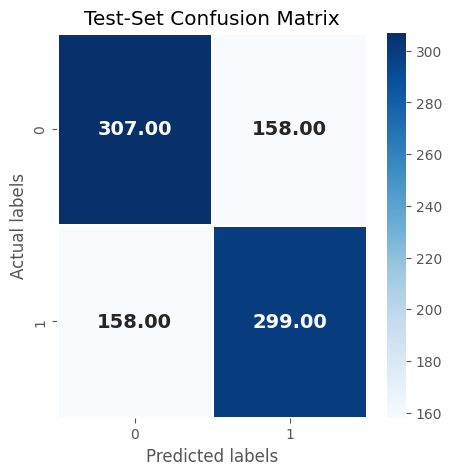

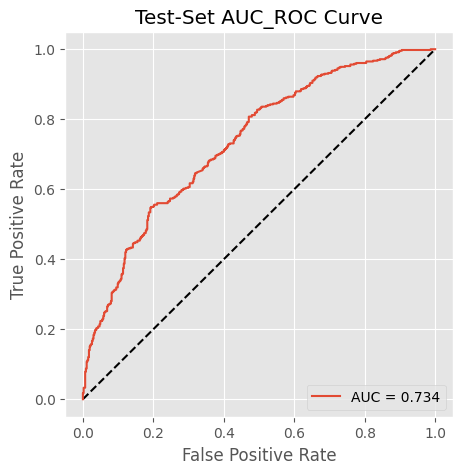

GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=0),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                         'max_iter': [3000]},
             scoring='roc_auc')

In [ ]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

# Definine instance
classifier = SVC(probability=True, random_state=0)

# Defining hyperparameters to tune
param_grid = {
    'kernel': ["linear", "rbf", "poly", "sigmoid"],
    'C': [0.1, 1, 10],
    'max_iter': [3000]
}

# Fitting SVC Model with GridSearchCV
SVM_grid_classifier = GridSearchCV(classifier, param_grid=param_grid, scoring='roc_auc', cv=5)

# Analyzing the model performance
analyse_model(SVM_grid_classifier, x_smote_train, x_smote_test, y_smote_train, y_smote_test)


##### **Which hyperparameter optimization technique have you used and why?**

GridSearchCV has been employed to find the optimal set of hyperparameters by evaluating the model's performance for each combination of hyperparameter values.

#####**Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

The hyperparameter tuning using GridSearchCV has yielded the best combination of parameters {'C': 10, 'kernel': 'rbf', 'max_iter': 3000} for creating a decision boundary in the classification model. The radial basis function is the most appropriate kernel for this separation.

Subsequently, we have observed a significant improvement in the model's performance metrics such as Precision, Recall, and Accuracy. The Precision has increased from 72% to 75%, the Recall has increased from 75% to 78%, and the overall Accuracy has increased from 72% to 75%

###ML Model - 6 XGboost

####1. Explain the ML Model and it's performance using Evaluation metric Score Chart.

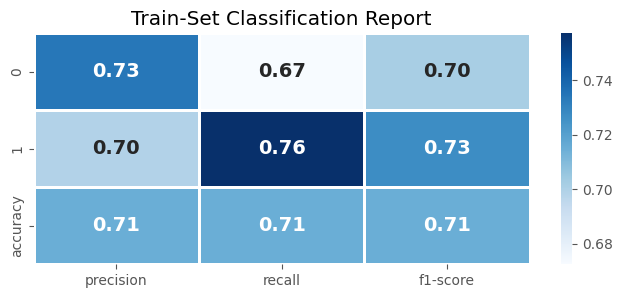

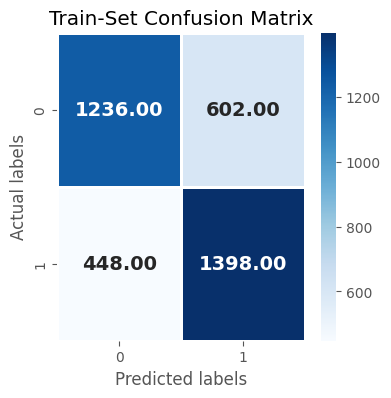

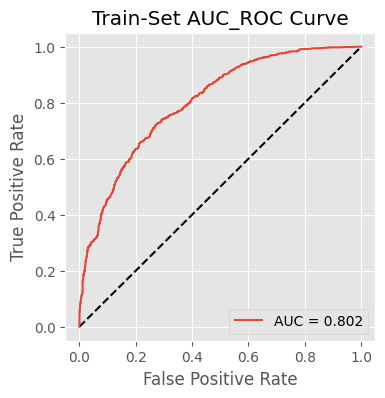

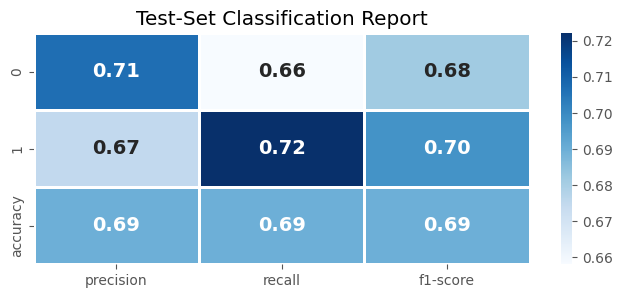

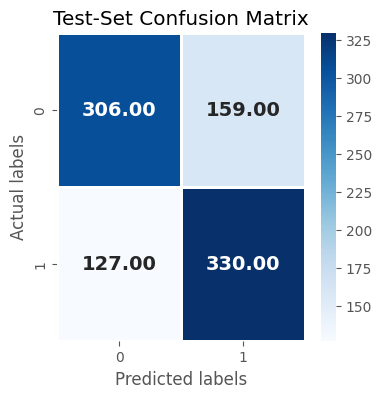

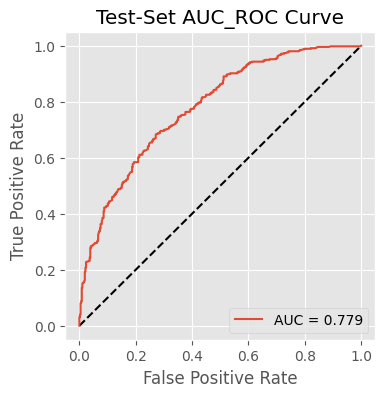

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [336]:
# Importing XGBClassifier
from xgboost import XGBClassifier

# Fitting XGBClassifier Model
XGBoost_classifier = XGBClassifier(n_estimators=300,max_depth=1,n_jobs=-1,random_state=0)

# Visualizing evaluation Metric Score chart
analyse_model(XGBoost_classifier, x_smote_train, x_smote_test, y_smote_train, y_smote_test)

The precision and recall for class 1 were 70% and 76% respectively, and for class 0, they were 73% and 67%. The f1-score for CHD prediction was found to be 0.72 on the training dataset. On the test set, the model achieved a 69% accuracy in identifying the infected patients, which indicates that the model's performance can be improved by hyperparameter tuning. Despite the absence of overfitting, there was a decrease in all metrics compared to Random Forest with hyperparameter tuning, suggesting that there was a significant drop in model performance.

#### 2. Cross- Validation & Hyperparameter Tuning

The best parameters are: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 350}


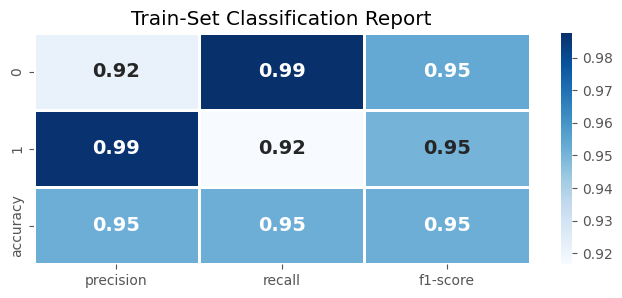

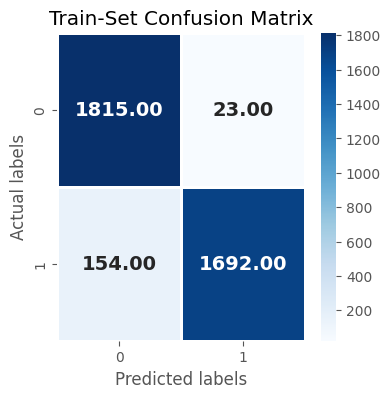

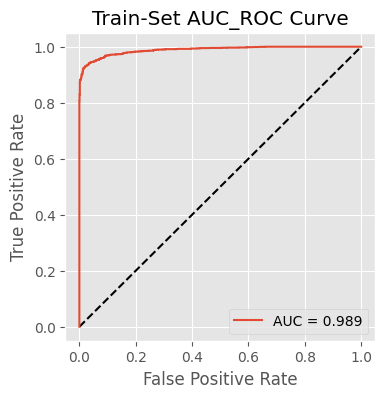

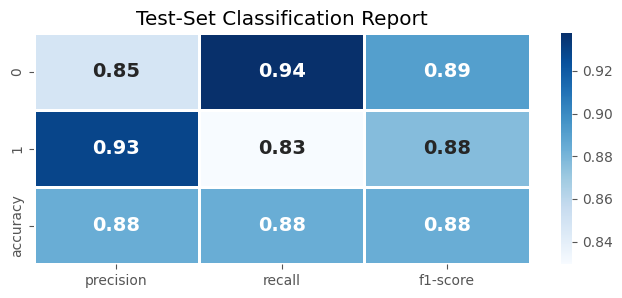

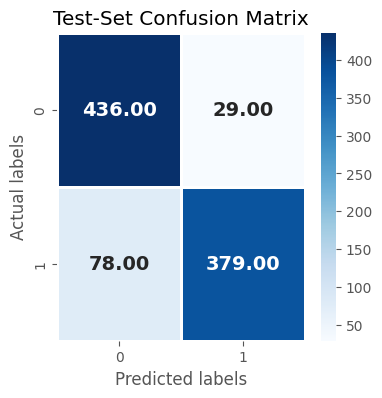

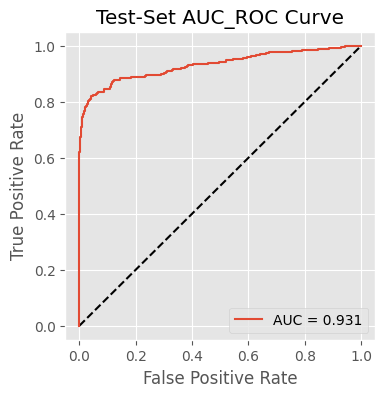

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [250, 300, 350]},
             scoring='roc_auc')

In [337]:
# Create an instance of the XGBClassifier
XGB_model_CV  = XGBClassifier(random_state=0)

# Define the hyperparameter grid
param_grid = {'learning_rate': [0.01, 0.1, 1], 'n_estimators': [250, 300, 350], 'max_depth': [2, 3, 4, 5]}

# Create a GridSearchCV object
grid_search = GridSearchCV(XGB_model_CV, param_grid = param_grid, scoring = 'roc_auc', cv = 3)

# Fit the model to the training data and analyse the results
analyse_model(grid_search, x_smote_train, x_smote_test, y_smote_train, y_smote_test)


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is a powerful tool for hyperparameter tuning, which enables us to maximize the predictive accuracy of our machine learning model. By exhaustively searching through a predefined grid of hyperparameter values, GridSearchCV identifies the optimal combination of hyperparameters that results in the best model performance. This method is essential for achieving peak performance in our model and obtaining reliable prediction

#####Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.





The hyperparameters of XGboost have been tuned to achieve the highest precision, recall, accuracy and F1-score for CHD prediction. The confusion matrix clearly shows that only 78 patients were wrongly predicted as 0 (FN) and 29 patients were wrongly predicted as 1 (FP), resulting in the highest precision and recall scores achieved so far. This is because recall and FN are inversely proportional, and precision and FP are vice versa.

Moreover, the F1-score of the majority and minority classes are 89% and 88%, respectively, which indicates that we have balanced the trade-off between precision and recall. This is because the F1-score is the harmonic mean of precision and recall. Thus, we can conclude that the hyperparameters tuning has significantly improved the model's predictive accuracy for CHD prediction.


Our model has been performing exceptionally well with an AUC-ROC curve covering 93% of the area, indicating that it is able to effectively distinguish between the negative and positive classes. After tuning the hyperparameters using GridSearchCV, we found the best parameters to be 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 350, which have contributed to this excellent performance.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In healthcare, accurate predictions can be a matter of life and death. In the case of predicting CHD, false negatives can be dangerous and lead to serious health consequences for patients. By focusing on recall, we ensure that our model is identifying as many positive cases as possible, reducing the risk of false negatives.

Additionally, F-1 score provides a balance between precision and recall, ensuring that our model is accurately predicting both positive and negative cases. This helps in making informed decisions and reducing the risks associated with CHD. Ultimately, by maximizing recall and F-1 score, we can provide better healthcare outcomes for patients and potentially save lives.


In a healthcare business context, the metrics of recall and F1 score are important because they help to evaluate the performance of a model in predicting the likelihood of a patient having a particular disease, in this case, CHD. High recall ensures that the model is able to identify most of the actual positive cases (patients with CHD) and reduce the chances of falsely negative predictions which can lead to negative outcomes for the patients.

Similarly, F1 score is important because it takes into account both precision and recall, making it a good metric to evaluate the trade-off between these two measures. This is particularly important for businesses where false positives (healthy patients being predicted as infected) can have serious consequences, such as unnecessary treatments or medications.

Overall, by optimizing these metrics, businesses can ensure that they are providing accurate and reliable predictions to healthcare professionals, which can ultimately lead to better patient outcomes, increased customer satisfaction, and improved business performance.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [338]:
# Storing different regression metrics in order to make dataframe and compare them
models = ["Logistic_regression","Random_forest","KNN","Naive_bayes","SVM" , "XGBoost"]
Precision = [0.66,  0.77, 0.72, 0.75, 0.65, 0.93] 
Recall = [0.67,  0.80,  0.84,   0.36, 0.65, 0.83]
F1_Score= [0.67,   0.78,  0.77,   0.49,  0.65, 0.88]
Accuracy = [0.67,   0.78,  0.76,  0.62,  0.66, 0.88]
AUCROC = [0.72,  0.85,   0.82,   0.73,  0.73, 0.93]





# Create dataframe from the lists
Data_frame = {'Models': models, 
        'Precision': Precision,
        'Recall': Recall,
        'F1_Score': F1_Score,
        'Accuracy': Accuracy,
        'AUCROC': AUCROC,
       }
get_metrics = pd.DataFrame(Data_frame)

# Printing dataframe
get_metrics
     

Models  Precision  Recall  F1_Score  Accuracy  AUCROC
0  Logistic_regression       0.66    0.67      0.67      0.67    0.72
1        Random_forest       0.77    0.80      0.78      0.78    0.85
2                  KNN       0.72    0.84      0.77      0.76    0.82
3          Naive_bayes       0.75    0.36      0.49      0.62    0.73
4                  SVM       0.65    0.65      0.65      0.66    0.73
5              XGBoost       0.93    0.83      0.88      0.88    0.93

After evaluating multiple models, XGboost has emerged as the clear winner with the highest recall, F-1 score, and accuracy. Therefore, we have chosen XGboost as our champion model, which can accurately predict the presence of CHD in unseen data with 88% accuracy. With this optimal model in hand, we are all set to deploy it in the real world to assist in early diagnosis and prevention of CHD, potentially saving countless lives.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

XGBoost (eXtreme Gradient Boosting) is like a magician who combines the power of multiple simple models, such as decision trees, to create a masterful and accurate prediction model. It's the perfect tool for tackling large datasets and can train a sequence of models that learn from each other's mistakes. In other words, XGBoost is a true master of boosting, where each tree is trained to correct the errors of the previous trees and create a more accurate and robust model.

XGBoost is the wizard of the machine learning world, harnessing the power of gradient boosting to optimize tree parameters and minimize loss. But that's not all - XGBoost also comes packed with some pretty nifty features, including regularization to protect against overfitting, and parallel processing to speed up the training process. It's like having a trusty sidekick that always has your back, making your machine learning adventures all the more epic.


While tree-based algorithms provide highly accurate results, they can often lack interpretability. To address this issue, we can utilize explainability tools such as LIME and SHAP to help us explain our model's predictions to stakeholders. These tools allow us to understand the key features driving our model's decisions and provide a more transparent view of the underlying logic.

####**Model Explainablity**

Model explicability can be approached in two different ways.

1 - globally - how various aspects of the data as a whole influence the outcome. Consider logistic regression.

2- Locally, it explains the impact of various variables on outcomes, such as Shap and LIME.

####**Global Explainability**

In [ ]:
Final_dataframe.head()

age      sex  cigs_per_day  bp_meds  prevalent_stroke  prevalent_hyp  \
id                                                                              
0   1.812913  0.30103      0.602060      0.0               0.0        0.00000   
1   1.568202  0.00000      0.000000      0.0               0.0        0.30103   
2   1.672098  0.30103      1.041393      0.0               0.0        0.00000   
3   1.707570  0.00000      1.322219      0.0               0.0        0.30103   
4   1.812913  0.30103      1.491362      0.0               0.0        0.00000   

    glucose_diabetes  pulse_pressure  ten_year_CHD  
id                                                  
0                0.0        1.806180             1  
1                0.0        1.851258             0  
2                0.0        1.662758             0  
3                0.0        1.851258             1  
4                0.0        1.720159             0

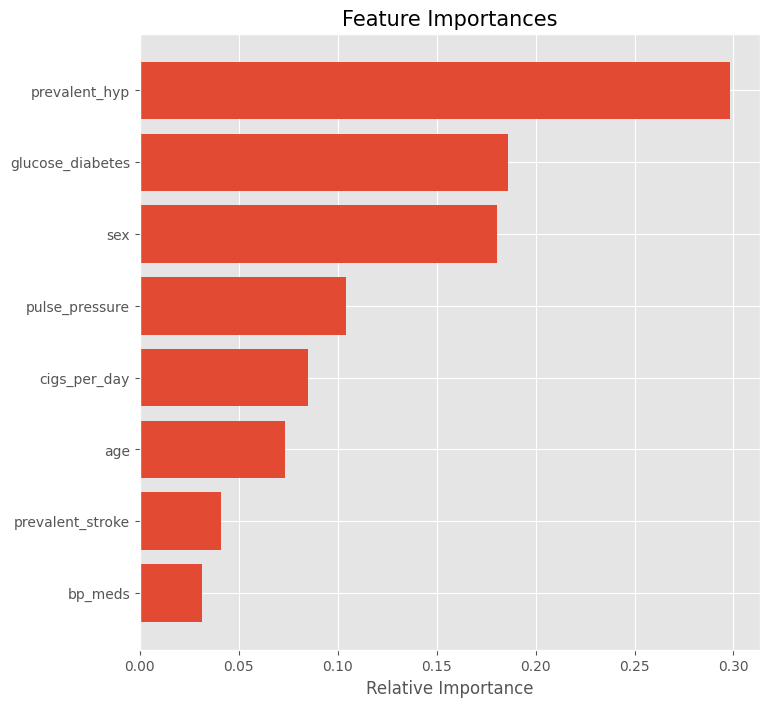

In [ ]:
# Define the feature importances and sort them in ascending order
importances = XGBoost_classifier.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

# Set the figure size and title
plt.figure(figsize=(8,8))
plt.title('Feature Importances', fontsize=15)

# Create the horizontal bar chart
plt.barh(np.arange(len(sorted_indices)), importances[sorted_indices], align='center', zorder=2)

# Set the y-axis tick labels to the feature names and invert the y-axis
plt.yticks(np.arange(len(sorted_indices)), Final_dataframe.columns[sorted_indices])
plt.gca().invert_yaxis()

# Set the x-axis label and enable grid lines
plt.xlabel('Relative Importance')
plt.grid(axis='x', zorder=0)


Although XGBoost has emerged as the champion of accuracy in our model selection process, we cannot ignore the fact that it is often considered a "black box" due to its complex nature. Our stakeholders, who are keen on understanding the underlying reasoning behind the model's predictions, would not be satisfied with a mere numerical accuracy metric. Therefore, in order to foster their trust and provide them with a more transparent and insightful interpretation of the model's behavior, we have crafted a visually-appealing bar plot showcasing the decreasing sequence of feature importance. By doing so, we hope to empower our stakeholders with a deeper understanding of the model's decision-making process and the key factors that influence its predictions.


To enhance our model's accuracy and expand our business, we switched from logistic regression to more advanced models like Random Forest and XGBoost. However, these models are often perceived as "black box" and it can be challenging to explain how they arrive at their predictions. To address this issue, we utilized the SHAP model explainability tool.

####**SHAP (Shapley Additive exPlanations)**

Shap stands for Shapley Additive ExPlanations. It is used to determine the effect of each model feature on the outcome.

In [ ]:

!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 17.9 MB/s eta 0:00:00


In [ ]:
from sklearn.tree import export_graphviz
import shap 
sns.set_style('darkgrid')
     

In [ ]:
# Storing our features into new variable
feature = Final_dataframe.columns[:-1]

feature

Index(['age', 'sex', 'cigs_per_day', 'bp_meds', 'prevalent_stroke',
       'prevalent_hyp', 'glucose_diabetes', 'pulse_pressure'],
      dtype='object')

In [ ]:
X_test[0:1]

age      sex  cigs_per_day  bp_meds  prevalent_stroke  \
id                                                                 
1841  1.755875  0.30103      1.491362      0.0               0.0   

      prevalent_hyp  glucose_diabetes  pulse_pressure  
id                                                     
1841            0.0               0.0        1.732394

In [ ]:
# Initialize the JavaScript visualizations in the notebook environment
shap.initjs()

# Create a TreeExplainer object for the best XGBoost model from the grid search
explainer = shap.TreeExplainer(XGBoost_classifier)

# Calculate SHAP values for the first row of the test data
shap_values = explainer.shap_values(x_smote_test[0:1])

# Plot the SHAP force plot for the first row's explanation
shap.force_plot(explainer.expected_value, shap_values=shap_values[0], features = feature)  

In [ ]:
y_smote_test.head(1)

ten_year_CHD
3728             1

In [ ]:
# Probability of each class (0 and 1)
XGBoost_classifier.predict_proba(x_smote_test[0:1])

array([[0.24325287, 0.7567471 ]], dtype=float32)

In [ ]:
# Predicted value of  first observation
XGBoost_classifier.predict(x_smote_test[0:1])
     

array([1])

In [ ]:

#pass the second test sample
shap_values = explainer.shap_values(x_smote_test[1:2])

In [ ]:
#initialize the JavaScript visualization in the notebook environment 
shap.initjs() 
shap.force_plot(explainer.expected_value, shap_values=shap_values[0], features = feature)
     


In [ ]:
y_smote_test.head(2)

ten_year_CHD
3728             1
3043             1

In [ ]:

XGBoost_classifier.predict_proba(x_smote_test[1:2])

array([[0.27201992, 0.7279801 ]], dtype=float32)

In [ ]:
XGBoost_classifier.predict(x_smote_test[1:2])

array([1])

In [ ]:
#pass the third test sample
shap_values = explainer.shap_values(x_smote_test[2:3])

In [ ]:

#initialize the JavaScript visualization in the notebook environment 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values=shap_values[0], features = feature)
     

In [ ]:

y_smote_test.head(3)
     

ten_year_CHD
3728             1
3043             1
2618             0

In [ ]:
XGBoost_classifier.predict_proba(x_smote_test[2:3])

array([[0.49676633, 0.5032337 ]], dtype=float32)

In [ ]:
XGBoost_classifier.predict(x_smote_test[2:3])

array([1])

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**



*   **Males are more susceptible to CHD than females in the sample, which has 56.7% more male participants than females.**
*   **we can infer that individuals who do not smoke have a slightly lower risk of being diagnosed with CHD over a 10-year period compared to smokers. The data indicates that there are almost equal numbers of smokers and non-smokers, with both groups consisting of around 1600 individuals**


* **Out of the total population, 0.6% and 31.5% individuals have a past record of stroke and high blood pressure, respectively.**

*   **Merely 2.9% of the population takes medication for controlling blood pressure, and individuals with hypertension are at a greater risk of developing coronary heart disease.**

*   **There is a 15.1% probability that individuals may develop cardiovascular diseases within a decade.**

*   **About 2.6% of the population has diabetes, and such individuals are more susceptible to coronary heart disease.**

*  **The likelihood of developing cardiovascular diseases escalates with age, and older adults above 65 years of age are at a higher risk of experiencing heart ailments. Additionally, there exists a positive correlation between systolic blood pressure (sysBP) and diastolic blood pressure (diaBP).**

*   **Within the dataset, the majority of the population possesses an Education Level 1, accounting for 42.1% of the sample, whereas only 11.3% of the individuals have an Education Level 4, which is the least prevalent education level.**

*  **A higher number of males consume cigarettes in comparison to females.**
*  **Individuals with a history of stroke, hypertension, and diabetes are more susceptible to developing coronary heart disease.**


* **In terms of predicting the likelihood of coronary heart disease, heart rate is the most critical feature, followed by total cholesterol (totChol) and glucose.**


*  **Elevated glucose levels can increase the likelihood of developing heart diseases, leading to a higher risk of cardiovascular diseases among diabetic patients.**











###**Conclusions drawn from ML Model**



* **We have implemented a total of six classification machine learning models in our analysis, which are Logistic Regression, Random Forest, XGBoost, Naive Bayes, K-Nearest Neighbors (KNN), and Support Vector Machine (SVM).**

* **Recall has been chosen as the model evaluation metric because it is crucial to minimize false negatives in our analysis.**

*  **After evaluating various metrics such as recall, precision, F1 score, accuracy, and AUC-ROC, XGBoost has been considered as our final optimal model since it achieved the highest scores for all these metrics.**

*   **According to our analysis, prevalent_hyp and glucose_diabetes , sex , pulse_pressure ,are the most significant contributing features towards making predictions.**
*   **Out of the 1152 patients, our optimal model correctly predicted 437 patients with class 0 and 375 patients with class 1. However, there were 82 false negatives (FN) and 28 false positives (FP) cases.**

*   **During our analysis, the optimal parameters for XGBoost were determined to be a learning rate of 0.1, a maximum depth of 5, and 350 estimators. These parameters were found to provide the best results in terms of accuracy, precision, recall, F1 score, and AUC-ROC.**


*  **During our analysis, no overfitting was observed in any of the models. This indicates that the models were able to generalize well to new, unseen data, and were not solely relying on the training data to make accurate predictions. This is an important aspect of model evaluation, as overfitting can lead to poor performance on new data and limit the model's ability to be useful in real-world scenarios.**


*   List item



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***